## Impulses and Physiological States in Theoretical Models of Nerve Membrane (1960)
### Richard Fitzhugh

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ODESolver import RungeKutta4, fixed_point
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings("ignore")

plt.rcParams.update({'font.size': 11})  
np.random.seed(19012024)

%matplotlib inline

### BVP model

In [2]:
class BVP_model:
    def __init__(self, a, b, c, z):
        self.a = a
        self.b = b
        self.c = c
        self.z = z

    def __call__(self, t, u):
        x, y = u[0], u[1]
        dx = self.c*(y + x - (x**3)/3. + self.z)
        dy = -(x - self.a + self.b * y)/self.c
        return dx, dy

In [3]:
def find_P(x0, a, b, z):
    f = lambda x, a, b, z: np.cbrt(3*(x*(1-1/b) + z + a/b))
    x = fixed_point(f, initial_guess=x0).compute([a, b, z])
    y = (a-x)/b
    return x, y

In [4]:
a, b, c, z = [0.7, 0.8, 3, 0]
x_space = [-1, 0.7, -2.1, 1.2, 2, 1, 1.5, 2, 0]
y_space = [0.3, -0.625, -1, -0.625, -2, 0.1, 0.8, 1, -0.625]

# y0 = (lambda x0, dot_x0, c: dot_x0/c + (x0**3)/3. - x0)(x0, dot_x0, c)
BVP_simulation = BVP_model(a=a, b=b, c=c, z=z)
evolution = RungeKutta4(BVP_simulation)

x_sim, y_sim = [], []

for x0, y0 in zip(x_space, y_space):
    # for x0 in x_space:    
    evolution.set_initial_condition([x0, y0])
    x, y = [], []
    for t_span in [(-200, -100), (0, 100)]:
        t, u = evolution.solve(t_span=t_span, N=10000)
        x.extend(u[:, 0])
        y.extend(u[:, 1])
    x_sim.append(x)
    y_sim.append(y)
x_sim, y_sim = np.array(x_sim), np.array(y_sim)
P_point = find_P(1.20, a, b, z)

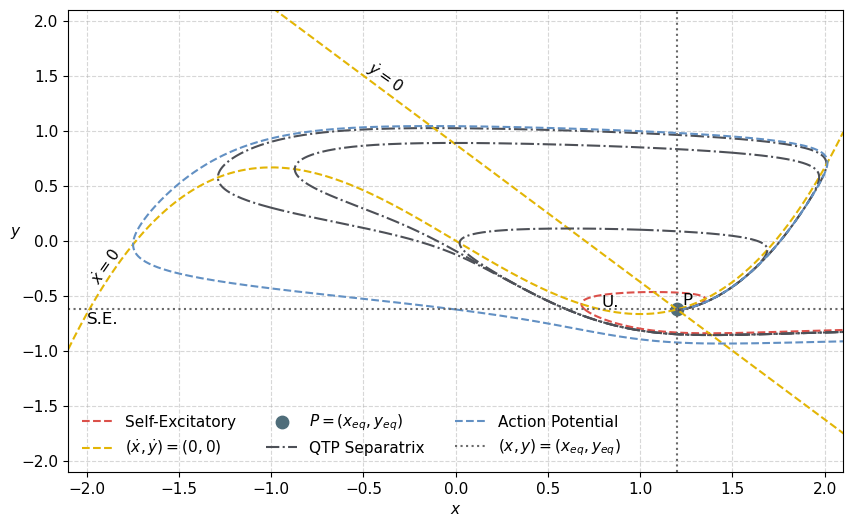

In [5]:
labels = ['', 'Self-Excitatory', r'$(\dot{x}, \dot{y})=(0, 0)$', 
          r'$P=(x_{eq}, y_{eq})$', '', 'QTP Separatrix', 
          '', 'Relatively Refranctory', 'Action Potential']
colors = ["#4D5057", "#db504a", "#e3b505", 
          "#4f6d7a", "#e3b505", "#4D5057", 
          "#4D5057", "#6CCFF6", "#6290c3", 
          "#28536B"]
ls=['-.', '--', '--', 
    '-.', '--', '-.', 
    '-.', '-', '--']

plt.figure(figsize=(10, 6))

for i in range(len(x_sim)):
    if i == 2:
        # dot{x} = 0
        x = np.linspace(-2.1, 2.1, 10001)
        plt.plot(x, (x**3)/3 - x - z, label=labels[i], ls=ls[i], color=colors[i])
    elif i == 3:
        # P point
        plt.scatter(P_point[0], P_point[1], label=labels[i], s=80, color=colors[i])
    elif i == 4:
        # dot{y} = 0
        y = y_sim[i][:10001]
        plt.plot(a-b*y, y, label=labels[i], ls=ls[i], color=colors[i])
    elif i == 7:
        continue
    else:
        plt.plot(x_sim[i], y_sim[i], label=labels[i], ls=ls[i], color=colors[i])

plt.xlim((-2.1, 2.1))
plt.ylim((-2.1, 2.1))
plt.hlines(-0.625, *plt.xlim(), color='dimgray', ls=':', lw=1.5, label=r'$(x, y)=(x_{eq}, y_{eq})$')
plt.vlines(1.20, *plt.ylim(), color='dimgray', ls=':', lw=1.5, label='')
plt.text(-0.5, 1.35, r'$\dot{y}=0$', rotation=-35)
plt.text(-2, -0.4, r'$\dot{x}=0$', rotation=55)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$', rotation=0)
plt.text(-2, -0.75, 'S.E.', size=12)
plt.text(1.23, -0.58, 'P', size=12)
plt.text(0.79, -0.6, 'U.', size=12)
# plt.title('Phase plane and physiological state diagram of BVP model, ' + r'$z=0$')
plt.legend(loc='lower left', ncol=3, frameon=False)
plt.grid(ls='--', alpha=0.5)
plt.savefig('img/BVP_z_0.png', transparent=True, dpi=500)
plt.show()

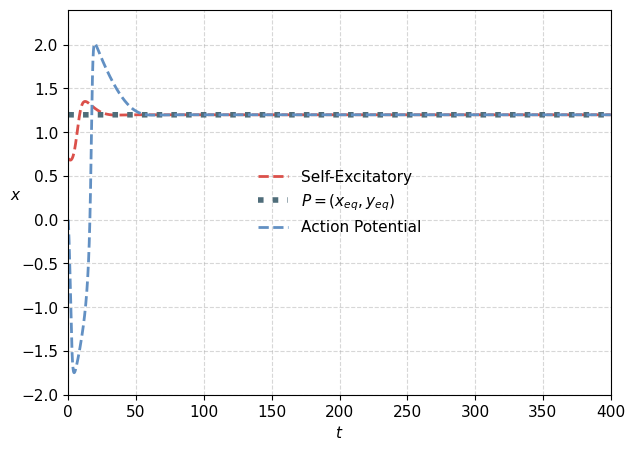

In [6]:
plt.figure(figsize=(7, 5))
for j in range(len(x_sim)):
    if j == 2 or j == 4 or j == 7 or 'QTP' in labels[j] or labels[j] == '': continue
    plt.plot(np.arange(0, 500+0.01, 0.05), np.concatenate((x_sim[j][0:10001:-1], x_sim[j][10001:])), 
             label=labels[j], color=colors[j], 
             ls=ls[j] if j !=3 else ':', lw=2 if j !=3 else 4)
plt.ylim(-2., 2.4)
plt.xlim((-0.1, 400))
plt.legend(frameon=False, loc='center')
plt.xlabel(r'$t$')
plt.ylabel(r'$x$', rotation=0)
plt.grid(ls='--', alpha=0.5)
plt.savefig('img/BVP_spike_train_z_0.png', transparent=True, dpi=500)
plt.show()

In [7]:
import glob
from PIL import Image
def make_gif(frame_folder, name="prova.gif"):
    frames = [Image.open(image) for image in glob.glob(f"{frame_folder}/*.png")]
    frames = frames + [frames[-1]]*100
    frame_one = frames[0]
    frame_one.save(name, format="GIF", append_images=frames,
               save_all=True, duration=10, loop=0)

In [8]:
# t = np.arange(0, 500+0.01, 0.05)
# x = np.concatenate((x_sim[-1][0:10001:-1], x_sim[-1][10001:]))
# y = np.concatenate((y_sim[-1][0:10001:-1], y_sim[-1][10001:]))

# for i in range(0, 1000, 2):
#     fig, ax = plt.subplots(1, 2, figsize=(25, 7))
#     ax[0].plot(x[:i], y[:i], label='Action potential', 
#                ls='-', lw=2, color=colors[-1])
#     ax[0].set_xlabel(r'$x$')
#     ax[0].set_ylabel(r'$y$')
#     ax[0].legend(loc='upper left', frameon=False)
#     ax[0].grid(ls='--', alpha=0.5)
#     ax[0].set_xlim((-2.1, 2.1))
#     ax[0].set_ylim((-2.1, 2.1))

#     ax[1].plot(t[:i], x[:i], label='Action potential', ls='-', lw=2, color=colors[-1])
#     ax[1].hlines(1.20, 0, 50, label=r'$P$', ls=':', lw=3, color='k')
#     ax[1].set_xlabel(r'$t$')
#     ax[1].set_ylabel(r'$x$')
#     ax[1].legend(loc='center', frameon=False)
#     ax[1].grid(ls='--', alpha=0.5)
#     ax[1].set_ylim(-2., 2.4)
#     ax[1].set_xlim((-0.1, 50))
#     plt.savefig(f'img/gif/{i}.png', dpi=100, transparent=True)
#     plt.close()

In [9]:
# make_gif('img/gif', name="img/action_potential.gif")

In [10]:
x_dot_z_zero = x_sim[2][10001:][x_sim[2][10001:] < 1.2]
y_dot_z_zero = y_sim[4][:10001]
P = [x_sim[3], y_sim[3]]

$z\not=0: \: z = -0.128$

In [216]:
a, b, c, z = [0.7, 0.8, 3, -0.128]
P_prime = [1.20+z*np.cos(np.arctan(-1./b)), 
           (-(1.20+z*np.cos(np.arctan(-1./b)))+a)/b]
P_prime = find_P(P_prime[0], a, b, z)

x_space = [0, -2, 0, P_prime[0], P_point[0]]
y_space = [1, -1, 1, P_prime[1], P_point[1]]

BVP_simulation = BVP_model(a=a, b=b, c=c, z=z)
evolution = RungeKutta4(BVP_simulation)

x_sim_cath, y_sim_cath = [], []

for x0, y0 in zip(x_space, y_space):
    # for x0 in x_space:    
    evolution.set_initial_condition([x0, y0])
    x, y = [], []
    for t_span in [(-200, -100), (0, 100)]:
        t, u = evolution.solve(t_span=t_span, N=10000)
        x.extend(u[:, 0])
        y.extend(u[:, 1])
    x_sim_cath.append(x)
    y_sim_cath.append(y)
x_sim_cath, y_sim_cath = np.array(x_sim_cath), np.array(y_sim_cath)

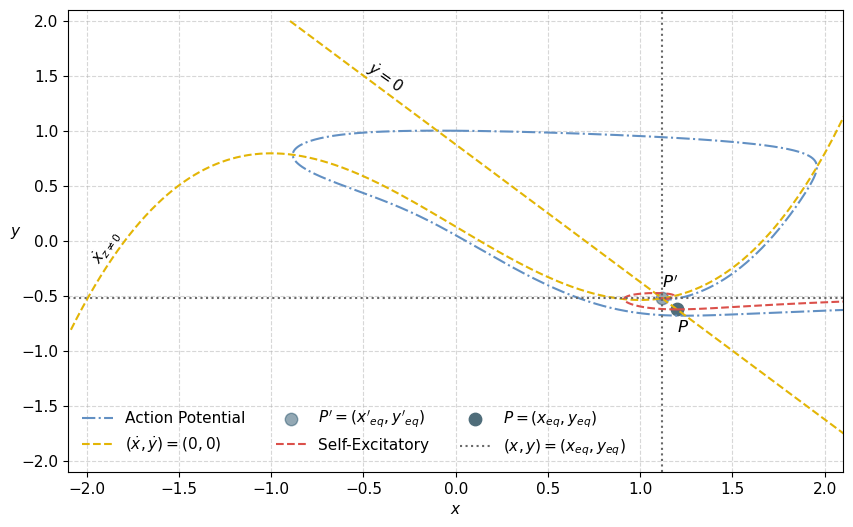

In [217]:
labels = ['Action Potential', r'$(\dot{x}, \dot{y})=(0, 0)$', '', 
          r"$P'=(x'_{eq}, y'_{eq})$", 'Self-Excitatory', 
          r"$P=(x_{eq}, y_{eq})$"]

colors = ["#6290c3", "#e3b505", 
          "#e3b505", "#28536B",
          "#db504a", "#4f6d7a",
          "#6CCFF6", "#6290c3", 
          "#28536B"]
ls=['-.', '--', '--', 
    '-.', '--', '--', 
    '--', '-', '--']

plt.figure(figsize=(10, 6))

for i in range(len(x_sim_cath)+1):
    if i == len(x_sim_cath):
        # P point
        plt.scatter([P_point[0]], [P_point[1]], label=labels[i], s=80, 
                    color=colors[i])
    elif i == 1:
        # dot{x} = 0
        x = np.unique(x_sim_cath[i])# [x_sim_cath[i][10001:] < 1.2-z]
        plt.plot(x, (x**3)/3 - x  - z, label=labels[i], ls=ls[i], color=colors[i])
    elif i == 2:
        # dot{y} = 0
        y = np.linspace(-2, 2, 10001)
        plt.plot(a-b*y, y, label=labels[i], ls=ls[i], color=colors[i])
    elif i == 3:
        # P' point
        plt.scatter(P_prime[0], P_prime[1], label=labels[i], s=80, 
                    color=colors[i], alpha=0.5)
    else:
        plt.plot(x_sim_cath[i], y_sim_cath[i], label=labels[i], ls=ls[i], color=colors[i])

comparison = False
if comparison:
    # plot old dot{x} = 0
    x = np.linspace(-2.1, 2.1, 10001)
    plt.plot(x, (x**3)/3 - x, ls='--', color=colors[2], alpha=0.5)
plt.xlim((-2.1, 2.1))
plt.ylim((-2.1, 2.1))
plt.hlines(P_prime[1], *plt.xlim(), color='dimgray', ls=':', lw=1.5, label=r'$(x, y)=(x_{eq}, y_{eq})$')
plt.vlines(P_prime[0], *plt.ylim(), color='dimgray', ls=':', lw=1.5, label='')
plt.text(-0.5, 1.35, r'$\dot{y}=0$', rotation=-35)
plt.text(-2, -0.2, r'$\dot{x}_{z \neq 0}$', rotation=55)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$', rotation=0)
plt.text(P_prime[0], P_prime[1]+0.1, r"$P'$", size=12)
plt.text(P_point[0], P_point[1]-0.2, r"$P$", size=12)
# plt.title('Phase plane and physiological state diagram of BVP model, ' + r'$z=0$')
plt.legend(loc='lower left', ncol=3, frameon=False)
plt.grid(ls='--', alpha=0.5)
if comparison:
    plt.text(-1.5, 0.2, r'$\dot{x}_{z = 0}$', rotation=40)
    plt.savefig('img/BVP_z_cath_comparison_dot_x.png', transparent=True, dpi=500)
else:
    plt.savefig('img/BVP_z_cath.png', transparent=True, dpi=500) 
plt.show()

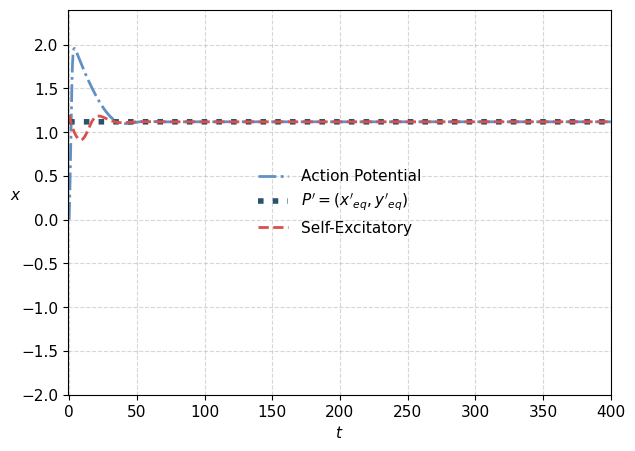

In [218]:
plt.figure(figsize=(7, 5))
for j in range(len(x_sim_cath)):
    if j == 1 or labels[j] == '': continue
    plt.plot(np.arange(0, 500+0.01, 0.05), np.concatenate((x_sim_cath[j][0:10001:-1], x_sim_cath[j][10001:])), 
             label=labels[j], color=colors[j], 
             ls=ls[j] if j !=3 else ':', lw=2 if j !=3 else 4)
plt.ylim(-2., 2.4)
plt.xlim((-0.7, 400))
plt.legend(frameon=False, loc='center')
plt.xlabel(r'$t$')
plt.ylabel(r'$x$', rotation=0)
plt.grid(ls='--', alpha=0.5)
# plt.savefig('img/BVP_spike_train_cath.png', transparent=True, dpi=500)
plt.show()

In [219]:
# Rectangular pulse
T = 0.5
f_z = np.vectorize(lambda t: 0.4 if t < T else 0)
z_pulse = f_z(np.linspace(0, 2, 500))
x0, y0 = find_P(1.20+(0.4)*np.cos(np.arctan(-1./b)), a, b, 0.4)
# Start from the stable point with z=0.4. 
# Then when the anodal pulse ends, go back to P=(1.20, -0.625) 
x, y = [], []
x_start, y_start = P_point
for z in tqdm([0.4, 0]):
    BVP_simulation = BVP_model(a=a, b=b, c=c, z=z)
    evolution = RungeKutta4(BVP_simulation)

    evolution.set_initial_condition([x_start, y_start])
    t, u = evolution.solve(t_span=(0, 100), N=10000)
    i = int(10000/4) if z != 0 else None
    j = 0 if z != 0 else 1
    x.append(u[j:i, 0])
    y.append(u[j:i, 1])
    x_start, y_start = x[0][-1], y[0][-1]
x_sim_pulse, y_sim_pulse = np.concatenate((x[0], x[1])), np.concatenate((y[0], y[1]))

  0%|          | 0/2 [00:00<?, ?it/s]

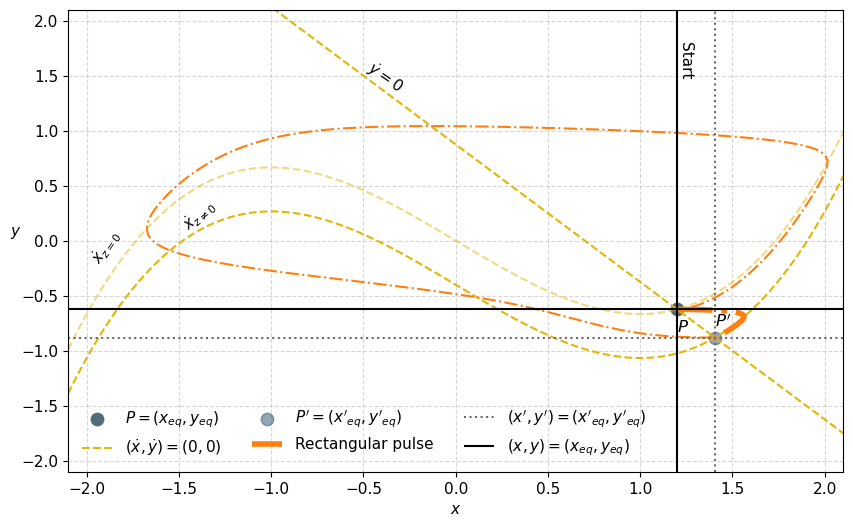

In [235]:
labels = ['Rectangular pulse', r'$(\dot{x}, \dot{y})=(0, 0)$', '', 
          r"$P'=(x'_{eq}, y'_{eq})$", r"$P=(x_{eq}, y_{eq})$"]

colors = ["tab:orange", "#e3b505", 
          "#e3b505", "#28536B",
          "#4f6d7a", "#4f6d7a",
          "#6CCFF6", "#6290c3", 
          "#28536B"]
ls=['-.', '--', '--', 
    '-.', '--', '--', 
    '--', '-', '--']

plt.figure(figsize=(10, 6))

# P point
plt.scatter([P_point[0]], [P_point[1]], label=labels[4], s=80,
            color=colors[4])

# dot{x} = 0
x = np.linspace(-2.1, 2.1, 10001)
plt.plot(x, (x**3)/3 - x  - 0.4, label=labels[1], ls=ls[1], color=colors[1])

# dot{y} = 0
y = np.linspace(-2.1, 2.1, 10001)
plt.plot(a-b*y, y, label=labels[2], ls=ls[2], color=colors[2])

# P' point
plt.scatter([x0], [y0], label=labels[3], s=80, 
        color=colors[3], alpha=0.5)
# Rectangular pulse
plt.plot(x_sim_pulse[:int(10000/4)], y_sim_pulse[:int(10000/4)], lw=4,
         label=labels[0], ls=ls[0], color=colors[0])
plt.plot(x_sim_pulse[int(10000/4):], y_sim_pulse[int(10000/4):], ls=ls[0], color=colors[0])

comparison = True
if comparison:
    # plot old dot{x} = 0
    x = np.linspace(-2.1, 2.1, 10001)
    plt.plot(x, (x**3)/3 - x, ls='--', color=colors[2], alpha=0.5)
    plt.text(-2, -0.2, r'$\dot{x}_{z = 0}$', rotation=55)
plt.xlim((-2.1, 2.1))
plt.ylim((-2.1, 2.1))
plt.hlines(y0, *plt.xlim(), color='dimgray', ls=':', lw=1.5, label=r"$(x', y')=(x'_{eq}, y'_{eq})$")
plt.hlines(P_point[1], *plt.xlim(), color='k', ls='-', lw=1.5, label=r'$(x, y)=(x_{eq}, y_{eq})$')
plt.vlines(x0, *plt.ylim(), color='dimgray', ls=':', lw=1.5, label='')
plt.vlines(P_point[0], *plt.ylim(), color='k', ls='-', lw=1.5, label='')
plt.text(-0.5, 1.35, r'$\dot{y}=0$', rotation=-35)
plt.text(-1.5, 0.1, r'$\dot{x}_{z \neq 0}$', rotation=40)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$', rotation=0)
plt.text(x0, y0+0.1, r"$P'$", size=12)
plt.text(P_point[0], P_point[1]-0.2, r"$P$", size=12)
# plt.title('Phase plane and physiological state diagram of BVP model, ' + r'$z=0$')
plt.legend(loc='lower left', ncol=3, frameon=False)
plt.grid(ls='--', alpha=0.5)
plt.text(P_point[0]+0.01/2, 1.5, 'Start', rotation=-90)
if comparison:
    plt.savefig('img/BVP_z_pulse_dot_x.png', transparent=True, dpi=500)
else:
    plt.savefig('img/BVP_z_pulse.png', transparent=True, dpi=500) 
plt.show()

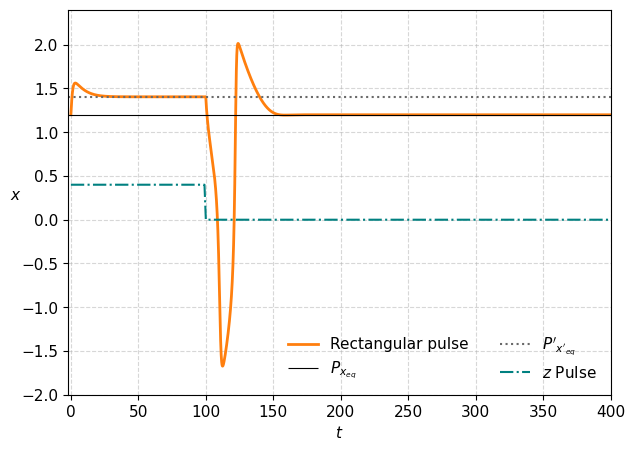

In [231]:
plt.figure(figsize=(7, 5))
plt.plot(np.arange(0, 500, 0.04), x_sim_pulse, 
         label=labels[0], color=colors[0], ls='-', lw=2)
plt.ylim(-2., 2.4)
plt.xlim((-2, 400))
plt.hlines(P_point[0], *plt.xlim(), ls='-', color='k', lw=0.8, label=r'$P_{x_{eq}}$')
plt.hlines(x0, *plt.xlim(), ls=':', color='dimgray', label=r"$P'_{x'_{eq}}$")
plt.plot([0.4]*100+[0]*400, ls='-.', color='teal', label=r'$z$'+f' Pulse')
plt.legend(frameon=False, loc='lower right', ncol=2)
plt.xlabel(r'$t$')
plt.ylabel(r'$x$', rotation=0)
plt.grid(ls='--', alpha=0.5)
plt.savefig('img/BVP_spike_train_z_pulse.png', transparent=True, dpi=500)
plt.show()

In [99]:
a, b, c, z = [0.7, 0.8, 3, -0.4]
P_prime_cath = [1.20+z*np.cos(np.arctan(-1./b)),
               (-(1.20+z*np.cos(np.arctan(-1./b)))+a)/b]
P_prime_cath = find_P(P_prime_cath[0], a, b, z)

x_space = [P_prime_cath[0], P_point[0]]
y_space = [P_prime_cath[1], P_point[1]]

BVP_simulation = BVP_model(a=a, b=b, c=c, z=z)
evolution = RungeKutta4(BVP_simulation)

x_sim_cath_neg, y_sim_cath_neg = [], []

for x0, y0 in zip(x_space, y_space):
    # for x0 in x_space:    
    evolution.set_initial_condition([x0, y0])
    x, y = [], []
    for t_span in [(-200, -100), (0, 100)]:
        t, u = evolution.solve(t_span=t_span, N=10000)
        x.extend(u[:, 0])
        y.extend(u[:, 1])
    x_sim_cath_neg.append(x)
    y_sim_cath_neg.append(y)
x_sim_cath_neg, y_sim_cath_neg = np.array(x_sim_cath_neg), np.array(y_sim_cath_neg)

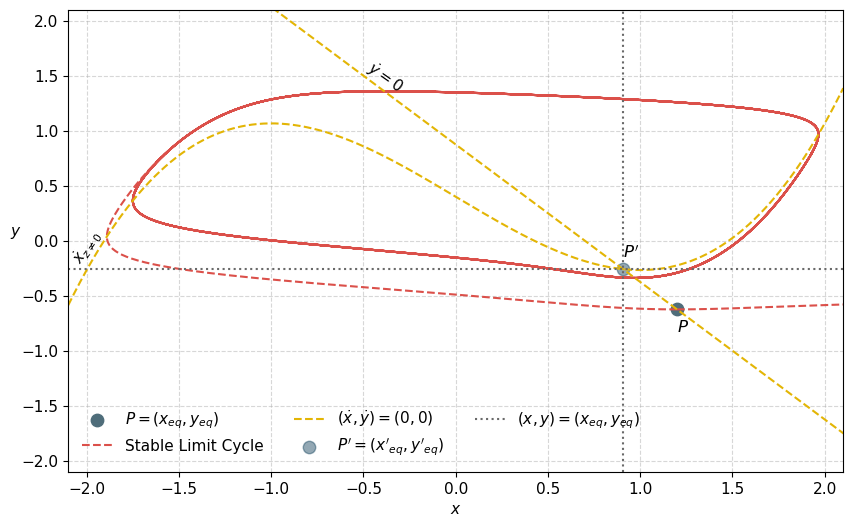

In [102]:
labels = [r'$(\dot{x}, \dot{y})=(0, 0)$', '', 
          r"$P'=(x'_{eq}, y'_{eq})$", 'Stable Limit Cycle', 
          r"$P=(x_{eq}, y_{eq})$"]

colors = ["#e3b505", "#e3b505", 
          "#28536B", "#db504a", 
          "#4f6d7a", "#6CCFF6", 
          "#6290c3", "#28536B"]
ls=['--', '--', 
    '-.', '--', '--', 
    '--', '-', '--']

plt.figure(figsize=(10, 6))


# P point
plt.scatter([P_point[0]], [P_point[1]], label=labels[4], s=80, 
            color=colors[4])
# Stable limit cicle
plt.plot(x_sim_cath_neg[1], y_sim_cath_neg[1], label=labels[3], ls=ls[3], color=colors[3])
# dot{x} = 0
x = np.linspace(-2.1, 2.1, 10001)
plt.plot(x, (x**3)/3 - x  - z, label=labels[0], ls=ls[0], color=colors[0])
# dot{y} = 0
y = np.linspace(-2.1, 2.1, 10001)
plt.plot(a-b*y, y, label=labels[1], ls=ls[1], color=colors[1])
# P' point
plt.scatter(P_prime_cath[0], P_prime_cath[1], label=labels[2], s=80, 
            color=colors[2], alpha=0.5)

comparison = False
if comparison:
    # plot old dot{x} = 0
    x = np.linspace(-2.1, 2.1, 10001)
    plt.plot(x, (x**3)/3 - x, ls='--', color=colors[0], alpha=0.5)
plt.xlim((-2.1, 2.1))
plt.ylim((-2.1, 2.1))
plt.hlines(P_prime_cath[1], *plt.xlim(), color='dimgray', ls=':', lw=1.5, label=r'$(x, y)=(x_{eq}, y_{eq})$')
plt.vlines(P_prime_cath[0], *plt.ylim(), color='dimgray', ls=':', lw=1.5, label='')
plt.text(-0.5, 1.35, r'$\dot{y}=0$', rotation=-35)
plt.text(-2.1, -0.2, r'$\dot{x}_{z \neq 0}$', rotation=55)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$', rotation=0)
plt.text(P_prime_cath[0], P_prime_cath[1]+0.1, r"$P'$", size=12)
plt.text(P_point[0], P_point[1]-0.2, r"$P$", size=12)
# plt.title('Phase plane and physiological state diagram of BVP model, ' + r'$z=0$')
plt.legend(loc='lower left', ncol=3, frameon=False)
plt.grid(ls='--', alpha=0.5)
if comparison:
    plt.text(-1.5, 0.2, r'$\dot{x}_{z = 0}$', rotation=40)
    plt.savefig('img/BVP_z_cath_comparison_dot_x_limit_cycle.png', transparent=True, dpi=500)
else:
    plt.savefig('img/BVP_z_cath_limit_cycle.png', transparent=True, dpi=500) 
plt.show()

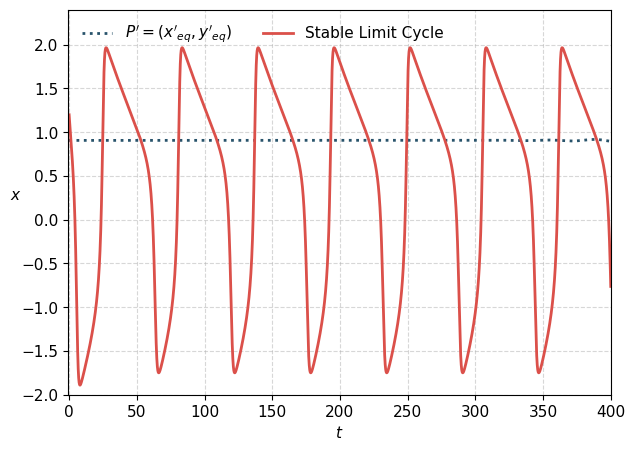

In [109]:
plt.figure(figsize=(7, 5))
for j in range(len(x_sim_cath_neg)):
    plt.plot(np.arange(0, 500+0.01, 0.05), np.concatenate((x_sim_cath_neg[j][0:10001:-1], x_sim_cath_neg[j][10001:])), 
             label=r"$P'=(x'_{eq}, y'_{eq})$" if j==0 else 'Stable Limit Cycle',
             color= "#28536B" if j==0 else "#db504a", 
             ls='-' if j==1 else ':', lw=2)
plt.ylim(-2., 2.4)
plt.xlim((-0.7, 400))
plt.legend(frameon=False, loc='upper left', ncol=2)
plt.xlabel(r'$t$')
plt.ylabel(r'$x$', rotation=0)
plt.grid(ls='--', alpha=0.5)
# plt.savefig('img/BVP_spike_train_cath_limit_cycle.png', transparent=True, dpi=500)
plt.show()

$z\not=0: \: z = +0.5$

In [14]:
a, b, c, z = [0.7, 0.8, 3, 0.5]
P_prime_prime = [1.20+z*np.cos(np.arctan(-1./b)),
                 (-(1.20+z*np.cos(np.arctan(-1./b)))+a)/b]
P_prime_prime = find_P(P_prime_prime[0], a, b, z)

x_space = [0, -2, 0, P_prime_prime[0], P_point[0]]
y_space = [1, -1, 1, P_prime_prime[1], P_point[1]]

BVP_simulation = BVP_model(a=a, b=b, c=c, z=z)
evolution = RungeKutta4(BVP_simulation)

x_sim_anod, y_sim_anod = [], []

for x0, y0 in zip(x_space, y_space):
    # for x0 in x_space:    
    evolution.set_initial_condition([x0, y0])
    x, y = [], []
    for t_span in [(-200, -100), (0, 100)]:
        t, u = evolution.solve(t_span=t_span, N=10000)
        x.extend(u[:, 0])
        y.extend(u[:, 1])
    x_sim_anod.append(x)
    y_sim_anod.append(y)
x_sim_anod, y_sim_anod = np.array(x_sim_anod), np.array(y_sim_anod)

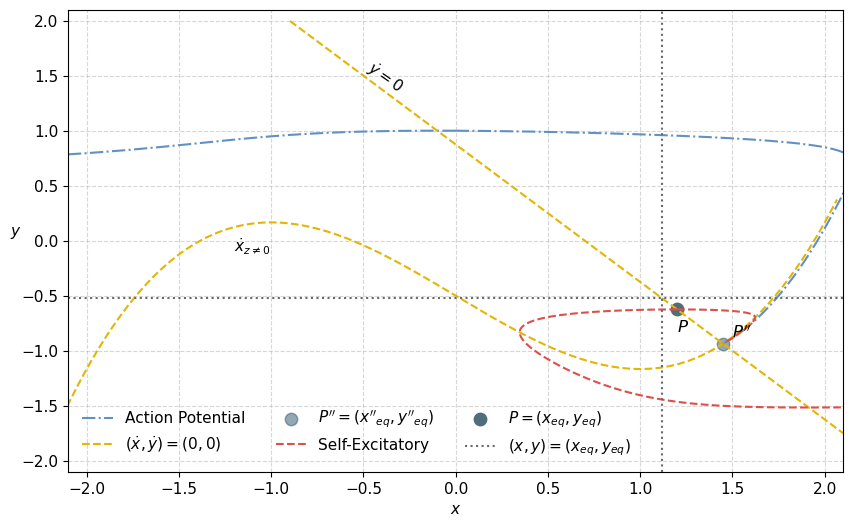

In [18]:
labels = ['Action Potential', r'$(\dot{x}, \dot{y})=(0, 0)$', '', 
          r"$P''=(x''_{eq}, y''_{eq})$", 'Self-Excitatory', 
          r"$P=(x_{eq}, y_{eq})$"]

colors = ["#6290c3", "#e3b505", 
          "#e3b505", "#28536B",
          "#db504a", "#4f6d7a",
          "#6CCFF6", "#6290c3", 
          "#28536B"]
ls=['-.', '--', '--', 
    '-.', '--', '--', 
    '--', '-', '--']

plt.figure(figsize=(10, 6))

for i in range(len(x_sim_anod)+1):
    if i == len(x_sim_anod):
        # P point
        plt.scatter([P_point[0]], [P_point[1]], label=labels[i], s=80, 
                    color=colors[i], alpha=1)
    elif i == 1:
        # dot{x} = 0
        x = np.unique(x_sim_anod[i])# [x_sim_anod[i][10001:] < 1.2-z]
        plt.plot(x, (x**3)/3 - x  - z, label=labels[i], ls=ls[i], color=colors[i])
    elif i == 2:
        # dot{y} = 0
        y = np.linspace(-2, 2, 10001)
        plt.plot(a-b*y, y, label=labels[i], ls=ls[i], color=colors[i])
    elif i == 3:
        # P'' point
        plt.scatter(P_prime_prime[0], P_prime_prime[1], label=labels[i], 
                    s=80, color=colors[i], alpha=0.5)
    else:
        plt.plot(x_sim_anod[i], y_sim_anod[i], label=labels[i], ls=ls[i], color=colors[i])

comparison = False
if comparison:
    # plot old dot{x} = 0
    x = np.linspace(-2.1, 2.1, 10001)
    plt.plot(x, (x**3)/3 - x, ls='--', color=colors[2], alpha=0.5)
plt.xlim((-2.1, 2.1))
plt.ylim((-2.1, 2.1))
plt.hlines(P_prime[1], *plt.xlim(), color='dimgray', ls=':', lw=1.5, label=r'$(x, y)=(x_{eq}, y_{eq})$')
plt.vlines(P_prime[0], *plt.ylim(), color='dimgray', ls=':', lw=1.5, label='')
plt.text(-0.5, 1.35, r'$\dot{y}=0$', rotation=-35)
plt.text(-1.2, -0.1, r'$\dot{x}_{z \neq 0}$', rotation=0)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$', rotation=0)
plt.text(P_prime_prime[0]+0.05, P_prime_prime[1]+0.05, r"$P''$", size=12)
plt.text(P_point[0], P_point[1]-0.2, r"$P$", size=12)
# plt.title('Phase plane and physiological state diagram of BVP model, ' + r'$z=0$')
plt.legend(loc='lower left', ncol=3, frameon=False)
plt.grid(ls='--', alpha=0.5)
if comparison:
    plt.text(-1.5, 0.5, r'$\dot{x}_{z = 0}$', rotation=30)
    plt.savefig('img/BVP_z_anod_comparison_dot_x.png', transparent=True, dpi=500)
else:
    plt.savefig('img/BVP_z_anod.png', transparent=True, dpi=500) 
plt.show()

### Hodgkin-Huxley

In [523]:
class HH_model:
    def __init__(self, I, g_Na=120, g_K=36, g_L=0.3, C=1, phi=1):
        self.I = I          # muA/cm^2
        self.C = C          # muF/cm^2
        self.g_Na = g_Na    # mmho/cm^2
        self.g_K = g_K      # mmho/cm^2
        self.g_L = g_L      # mmho/cm^2
        self.phi = phi      # mmho/cm^2

        self.a_m = lambda V: 0.1*(V+25)/(np.exp((V+25)/10)-1)
        self.b_m = lambda V: 4.*np.exp(V/18.)

        self.a_h = lambda V: 0.07*np.exp(V/20.)
        self.b_h = lambda V: 1./(np.exp((V+30)/10) + 1)

        self.a_n = lambda V: 0.01*(V+10)/(np.exp((V+10)/10)-1)
        self.b_n = lambda V: 0.125*np.exp(V/80.)


    def __call__(self, t, u):
        V, m, h, n = u[0], u[1], u[2], u[3]
        dV = (self.I - self.g_Na*(m**3)*h*(V+115) - self.g_K*(n**4)*(V-12) - self.g_L*(V+10.5989))/self.C
        dm = self.phi*((1-m)*self.a_m(V) - m*self.b_m(V))
        dh = self.phi*((1-h)*self.a_h(V) - h*self.b_h(V))
        dn = self.phi*((1-n)*self.a_n(V) - n*self.b_n(V))
        return dV, dm, dh, dn

In [524]:
I = 0

HH_simulation = HH_model(I=I)
evolution = RungeKutta4(HH_simulation)

# V_sim_HH, m_sim_HH, h_sim_HH, n_sim_HH = [], [], [], []
V0, m0, h0, n0 = [-14, 0.0, 0.6, 0.25]
evolution.set_initial_condition([V0, m0, h0, n0])

t, u = evolution.solve(t_span=(0, 100), N=100000)

V_sim_HH = u[:, 0]
m_sim_HH = u[:, 1]
h_sim_HH = u[:, 2]
n_sim_HH = u[:, 3]

In [525]:
# other simulation
V_sim_HH_extra, m_sim_HH_extra, h_sim_HH_extra, n_sim_HH_extra = [], [], [], []
V0, m0, h0, n0 = [-40, 0.0, 0.75, 0.1]
evolution.set_initial_condition([V0, m0, h0, n0])

t, u = evolution.solve(t_span=(0, 100), N=100000)
V_sim_HH_extra = u[:, 0]
m_sim_HH_extra = u[:, 1]
h_sim_HH_extra = u[:, 2]
n_sim_HH_extra = u[:, 3]

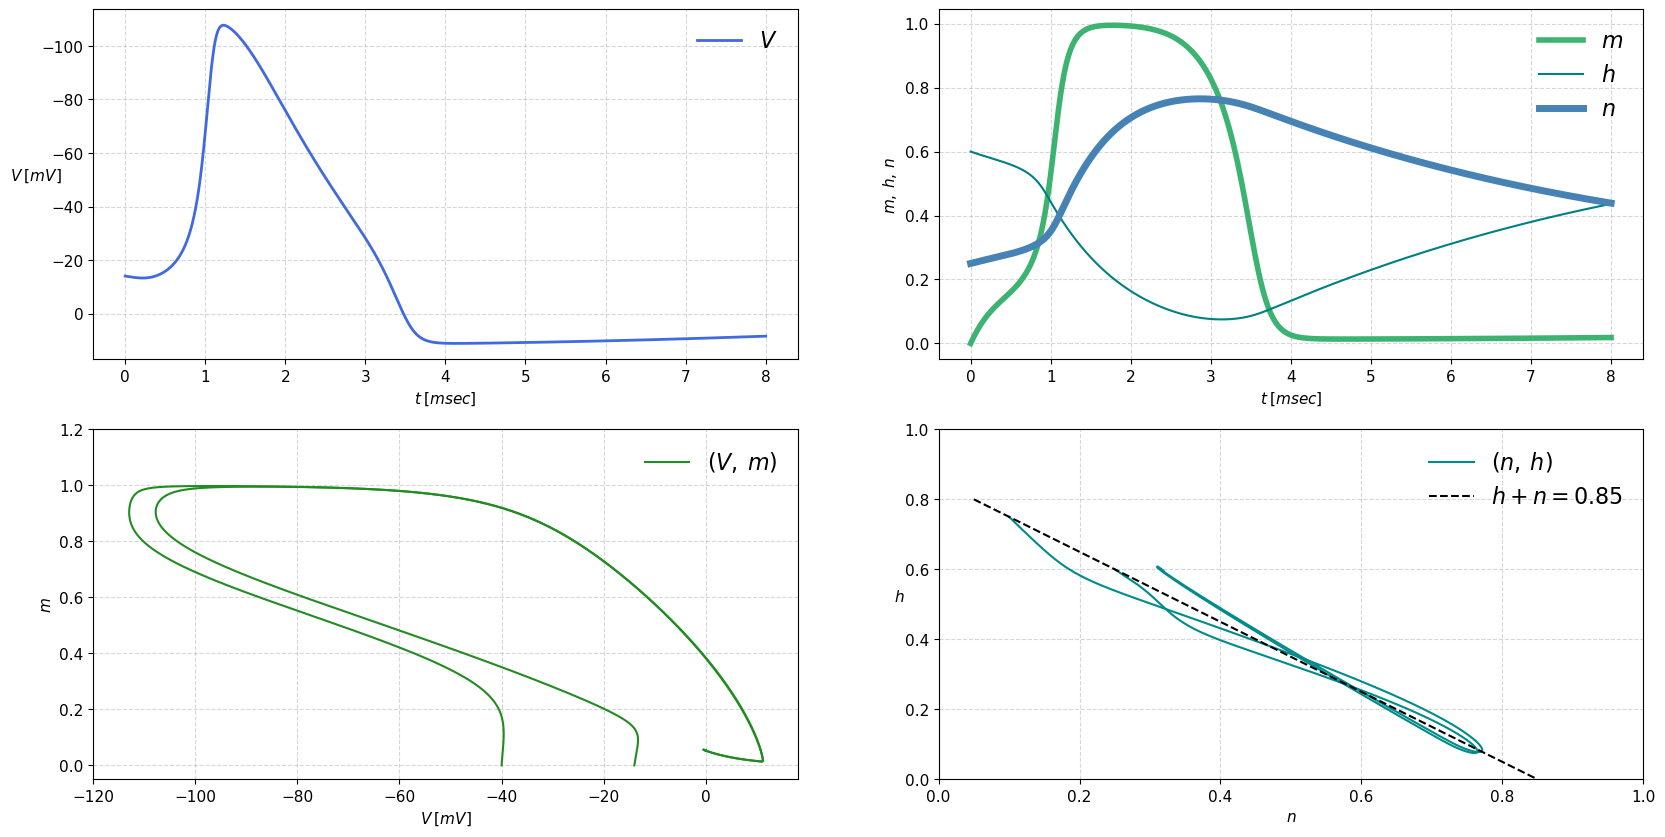

In [527]:
dotted_lines = False

dt = 100/100000 
time_HH = np.arange(0, 8+dt, dt)    # ms
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
# V plot
ax[0, 0].plot(time_HH, V_sim_HH[:len(time_HH)], 
           color='royalblue', lw=2, label=r'$V$')
ax[0, 0].set_xlabel(r'$t\:[msec]$')
ax[0, 0].set_ylabel(r'$V\:[mV]\qquad$', rotation=0)
ax[0, 0].grid(ls='--', alpha=0.5)
ax[0, 0].legend(frameon=False, fontsize=16)
# Invert the y-axis
ax[0, 0].invert_yaxis()

# m, h, n plot
ax[0, 1].plot(time_HH, m_sim_HH[:len(time_HH)], 
           color='mediumseagreen', label=r'$m$', lw=4)
ax[0, 1].plot(time_HH, h_sim_HH[:len(time_HH)], 
           color='teal', label=r'$h$')
ax[0, 1].plot(time_HH, n_sim_HH[:len(time_HH)], 
           color='steelblue', label=r'$n$', lw=5)
ax[0, 1].set_xlabel(r'$t\:[msec]$')
ax[0, 1].set_ylabel(r'$m,\:h,\:n$')
ax[0, 1].grid(ls='--', alpha=0.5)
ax[0, 1].legend(frameon=False, fontsize=16)

# phase plots: (V, m)
ax[1, 0].plot(V_sim_HH, m_sim_HH, color='forestgreen', 
           label=r'$(V,\:m)$', ls='-')
if dotted_lines:
    # u = V-36m
    for i, sample_u in enumerate([-120, -80 , -30]):
        ax[1, 0].plot(np.linspace([-120, -80, -30][i], [-80, -30, 0][i]), 
                  (lambda x: (x-sample_u)/36)(np.linspace([-120, -80, -30][i], [-80, -30, 0][i])), 
                  color='dimgray', ls=':', label=r'$u=V-36m$' if i == 0 else '')
ax[1, 0].plot(V_sim_HH_extra, m_sim_HH_extra, color='forestgreen', ls='-')
ax[1, 0].legend(frameon=False, fontsize=16)
ax[1, 0].grid(ls='--', alpha=0.5)
ax[1, 0].set_ylabel(r'$m$')
ax[1, 0].set_xlabel(r'$V\:[mV]$')
ax[1, 0].set_ylim((-0.05, 1.2))
ax[1, 0].set_xlim((-120, 18))

# phase plots: (n, h)
ax[1, 1].plot(n_sim_HH, h_sim_HH, color='darkcyan', 
           label=r'$(n,\:h)$', ls='-')
ax[1, 1].plot(n_sim_HH_extra, h_sim_HH_extra, color='darkcyan', ls='-')
# h+n = 0.85
ax[1, 1].plot(np.linspace(0.05, 0.85), (lambda x: 0.85-x)(np.linspace(0.05, 0.85)), 
              ls='--', color='k', label=r'$h+n=0.85$')
if dotted_lines:
    # w = 0.5(n-h)
    for j, sample_h in enumerate([0.5, 0., -0.45]):
        ax[1, 1].plot(np.linspace(0.1, 0.8), (lambda x: 0.5*(x-sample_h))(np.linspace(0.1, 0.8)), 
                  ls=':', color='dimgray', label=r'$w=(n-h)/2$' if j == 0 else '')
ax[1, 1].legend(frameon=False, fontsize=16)
ax[1, 1].grid(ls='--', alpha=0.5)
ax[1, 1].set_ylabel(r'$h$', rotation=0)
ax[1, 1].set_xlabel(r'$n$')
ax[1, 1].set_xlim(0, 1)
ax[1, 1].set_ylim(0, 1)

if dotted_lines:
    plt.savefig('img/HH_model_plot4_lines.png', transparent=True, dpi=500)
else:
    plt.savefig('img/HH_model_plot4.png', transparent=True, dpi=500)

plt.show()

In [528]:
# other simulations
V_sim_HH_extra, m_sim_HH_extra, h_sim_HH_extra, n_sim_HH_extra = [], [], [], []
for V0, m0, h0, n0 in zip([10, 15, 30], [0., 0., 1./36], [0.5, 0.3, 0.2], [0.5, 0.1, 0.]):
    evolution.set_initial_condition([V0, m0, h0, n0])

    t, u = evolution.solve(t_span=(0, 100), N=100000)
    V_sim_HH_extra = np.concatenate((V_sim_HH_extra, u[:, 0]))
    m_sim_HH_extra = np.concatenate((m_sim_HH_extra, u[:, 1]))
    h_sim_HH_extra = np.concatenate((h_sim_HH_extra, u[:, 2]))
    n_sim_HH_extra = np.concatenate((n_sim_HH_extra, u[:, 3]))

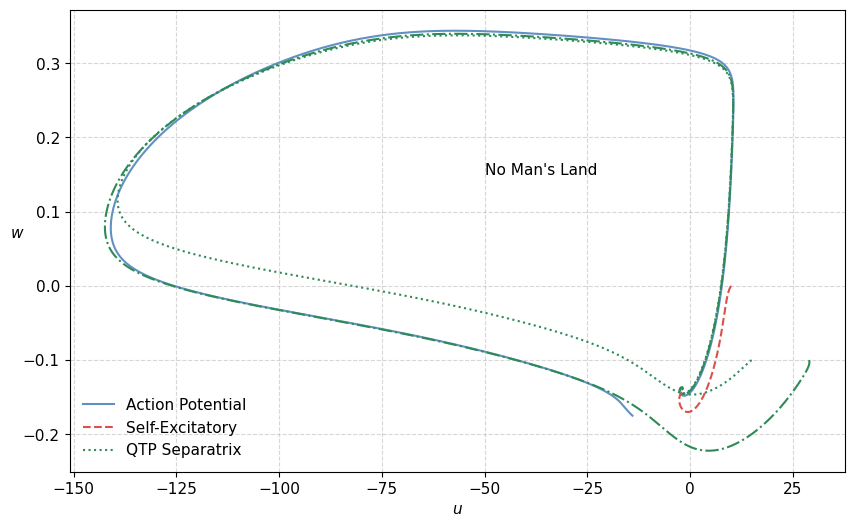

In [529]:
# (u, w) phase plane

labels = ['Action Potential', 'Self-Excitatory', 
          'QTP Separatrix', '']

colors = ["#6290c3", "#db504a", 
          "seagreen", "seagreen", 
          "#6290c3", "#28536B"]

ls=['-.', '--', ':', 
    '-.', '--', '--', 
    '--', '-', '--']

plt.figure(figsize=(10, 6))

plt.plot(V_sim_HH-36*m_sim_HH, (n_sim_HH-h_sim_HH)/2, label=labels[0], 
         ls='-', color=colors[0])
for k in range(3):
    plt.plot(V_sim_HH_extra[k*100001:(k+1)*100001]-36*m_sim_HH_extra[k*100001:(k+1)*100001], 
             (n_sim_HH_extra[k*100001:(k+1)*100001]-h_sim_HH_extra[k*100001:(k+1)*100001])/2, 
             label=labels[k+1], ls=ls[k+1], color=colors[k+1])

# comparison = False
# if comparison:
#     # plot old dot{x} = 0
#     x = np.linspace(-2.1, 2.1, 10001)
#     plt.plot(x, (x**3)/3 - x, ls='--', color=colors[2], alpha=0.5)
# plt.xlim((-2.1, 2.1))
# plt.ylim((-2.1, 2.1))
# plt.hlines(P_prime[1], *plt.xlim(), color='dimgray', ls=':', lw=1.5, label=r'$(x, y)=(x_{eq}, y_{eq})$')
# plt.vlines(P_prime[0], *plt.ylim(), color='dimgray', ls=':', lw=1.5, label='')
# plt.text(-0.5, 1.35, r'$\dot{y}=0$', rotation=-35)
# plt.text(-1.2, -0.1, r'$\dot{x}_{z \neq 0}$', rotation=0)
plt.xlabel(r'$u$')
plt.ylabel(r'$w$', rotation=0)
# plt.text(P_prime_prime[0]+0.05, P_prime_prime[1]+0.05, r"$P''$", size=12)
# plt.text(P_point[0], P_point[1]-0.2, r"$P$", size=12)
# plt.title('Phase plane and physiological state diagram of BVP model, ' + r'$z=0$')
plt.legend(loc='best', ncol=1, frameon=False)
plt.grid(ls='--', alpha=0.5)
# if comparison:
#     plt.text(-1.5, 0.5, r'$\dot{x}_{z = 0}$', rotation=30)
#     plt.savefig('img/BVP_z_anod_comparison_dot_x.png', transparent=True, dpi=500)
# else:
plt.text(-50, 0.15, "No Man's Land")
plt.savefig('img/physiological_diagram_HH.png', transparent=True, dpi=500) 
plt.show()

$I\not=0$

In [571]:
I_values = [-2.4, -1., 5., -10.]
V_sim_HH_I_not_zero = np.array([])
m_sim_HH_I_not_zero = np.array([])
h_sim_HH_I_not_zero = np.array([])
n_sim_HH_I_not_zero = np.array([])
for I in I_values:
    HH_simulation = HH_model(I=I)
    evolution = RungeKutta4(HH_simulation)

    # V_sim_HH, m_sim_HH, h_sim_HH, n_sim_HH = [], [], [], []
    V0, m0, h0, n0 = [0., 0.05, 0.6, 0.3]
    evolution.set_initial_condition([V0, m0, h0, n0])

    t, u = evolution.solve(t_span=(0, 100), N=100000)

    V_sim_HH_I_not_zero = np.concatenate((V_sim_HH_I_not_zero, u[:, 0]))
    m_sim_HH_I_not_zero = np.concatenate((m_sim_HH_I_not_zero, u[:, 1]))
    h_sim_HH_I_not_zero = np.concatenate((h_sim_HH_I_not_zero, u[:, 2]))
    n_sim_HH_I_not_zero = np.concatenate((n_sim_HH_I_not_zero, u[:, 3]))

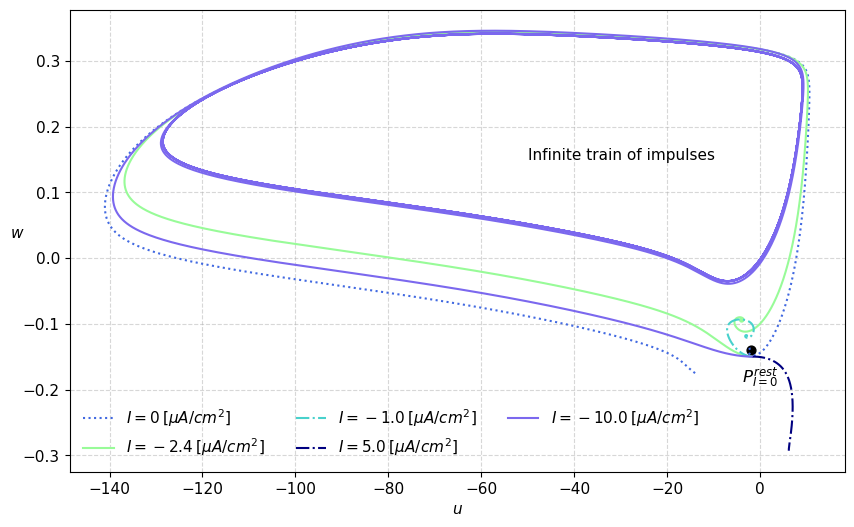

In [579]:
# (u, w) phase plane

labels = [r'$I='+f'{I}'+r'\:[\mu A/cm^2]$' for I in [0]+I_values]

colors = ['royalblue', 'palegreen', 'mediumturquoise', 
          'navy', 'mediumslateblue', 'mediumorchid']

ls = ['-', '-.', '-.']*2

plt.figure(figsize=(10, 6))


plt.plot(V_sim_HH-36*m_sim_HH, (n_sim_HH-h_sim_HH)/2, label=labels[0], 
         ls=':', color=colors[0])

for k in range(len(I_values)):
    plt.plot(V_sim_HH_I_not_zero[k*100001:(k+1)*100001]-36*m_sim_HH_I_not_zero[k*100001:(k+1)*100001], 
             (n_sim_HH_I_not_zero[k*100001:(k+1)*100001]-h_sim_HH_I_not_zero[k*100001:(k+1)*100001])/2, 
             label=labels[k+1], ls=ls[k], color=colors[k+1])

# comparison = False
# if comparison:
#     # plot old dot{x} = 0
#     x = np.linspace(-2.1, 2.1, 10001)
#     plt.plot(x, (x**3)/3 - x, ls='--', color=colors[2], alpha=0.5)
# plt.xlim((-2.1, 2.1))
# plt.ylim((-2.1, 2.1))
# plt.hlines(P_prime[1], *plt.xlim(), color='dimgray', ls=':', lw=1.5, label=r'$(x, y)=(x_{eq}, y_{eq})$')
# plt.vlines(P_prime[0], *plt.ylim(), color='dimgray', ls=':', lw=1.5, label='')
# plt.text(-0.5, 1.35, r'$\dot{y}=0$', rotation=-35)
# plt.text(-1.2, -0.1, r'$\dot{x}_{z \neq 0}$', rotation=0)
plt.xlabel(r'$u$')
plt.ylabel(r'$w$', rotation=0)
# plt.text(P_prime_prime[0]+0.05, P_prime_prime[1]+0.05, r"$P''$", size=12)
P_rest = [V_sim_HH[-1]-36*m_sim_HH[-1], (n_sim_HH[-1]-h_sim_HH[-1])/2]
plt.scatter([P_rest[0]], [P_rest[1]], marker='o', color='k', s=40)
plt.text(P_rest[0]-2, P_rest[1]-0.05, r"$P^{rest}_{I=0}$", size=12)
# plt.title('Phase plane and physiological state diagram of BVP model, ' + r'$z=0$')
plt.legend(loc='best', ncol=3, frameon=False)
plt.grid(ls='--', alpha=0.5)
# if comparison:
#     plt.text(-1.5, 0.5, r'$\dot{x}_{z = 0}$', rotation=30)
#     plt.savefig('img/BVP_z_anod_comparison_dot_x.png', transparent=True, dpi=500)
# else:
plt.text(-50, 0.15, "Infinite train of impulses")
plt.savefig('img/HH_model_I_not_zero.png', transparent=True, dpi=500) 
plt.show()

### $(z,\:x)$ characteristics for the `BVP` model corresponding to current voltage $(I,\:V)$ characteristics for `HH` model

In [ ]:
# starting from P rest point for BVP model for z=0:

# Characteristic for x_reduced system
y_x_char = P_point[1]
x_char = np.linspace(-2.1, 2.1, 10001)
z_x_char = -P_point[1] - x_char + (x_char**3)/3.

# complete system: dot{x} = dot{y} = 0
z_reduced_x_y = (x_char-a)/b - x_char + (x_char**3)/3.

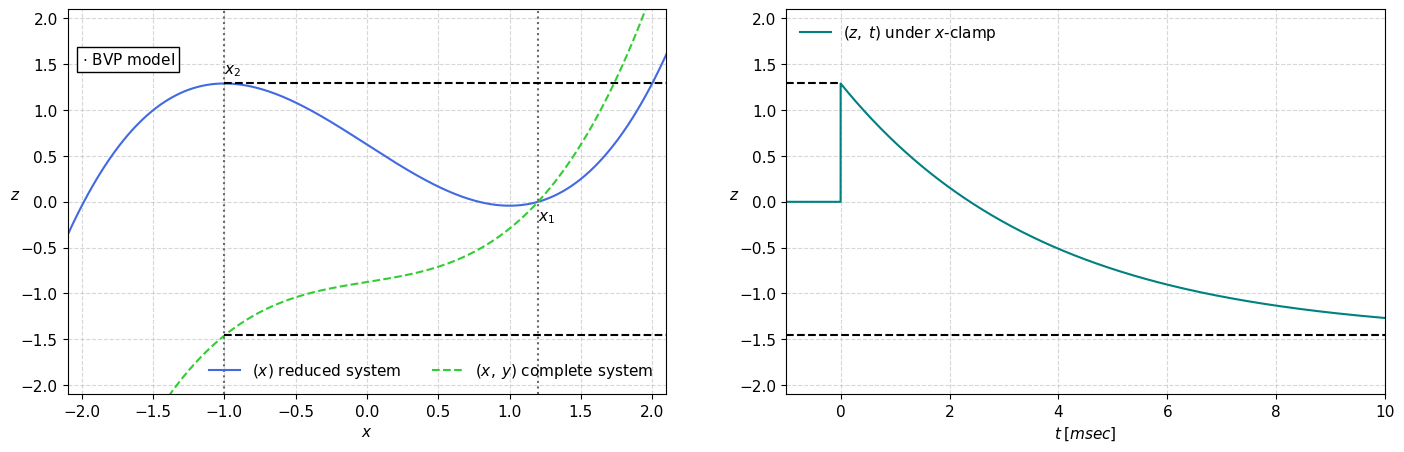

In [661]:
# x-clamp
x_1, x_2 = 1.2, -1.

fig, ax = plt.subplots(1, 2, figsize=(17, 5))
ax[0].plot(x_char, z_x_char, color='royalblue', ls='-', label=r'$(x)$ reduced system')
ax[0].plot(x_char, z_reduced_x_y, color='limegreen', ls='--', label=r'$(x,\:y)$ complete system')
ax[0].vlines(x_1, -2.1, 2.1, color='dimgray', ls=':')
ax[0].vlines(x_2, -2.1, 2.1, color='dimgray', ls=':')
ax[0].text(x_1, -0.2, r'$x_1$', rotation=0)
ax[0].text(x_2, 1.4, r'$x_2$', rotation=0)
ax[0].text(-2, 1.5, r'$\cdot$ BVP model', fontsize=11, 
           bbox=dict(facecolor='white', edgecolor='black', boxstyle='square'))

ax[0].hlines(-P_point[1] - x_2 + (x_2**3)/3., x_2, 2.1, color='k', ls='--')
ax[0].hlines((x_2-a)/b - x_2 + (x_2**3)/3., x_2, 2.1, color='k', ls='--')

ax[0].set_xlim(-2.1, 2.1)
ax[0].set_ylim(-2.1, 2.1)
ax[0].set_ylabel(r'$z$', rotation=0)
ax[0].set_xlabel(r'$x$')
ax[0].grid(ls='--', alpha=0.5)
ax[0].legend(loc='lower right', frameon=False, ncol=2)

time_2 = np.arange(-1, 10+dt, dt)
y_clamp = [(lambda a, b, c, x_2, t: (a-x_2)/b *(1.-np.exp(-b*t/c)) + P_point[1]*np.exp(-b*t/c) if t >=0 else P_point[1])(a, b, c, x_2, t) for t in time_2]
z_clamp = [(lambda y, x_2, t: -x_2 + (x_2**3)/3. - y if t>=0 else 0)(y_clamp[i], x_2, t) for i, t in enumerate(time_2)]
ax[1].plot(time_2, z_clamp, ls='-', color='teal', label=r'$(z,\:t)$ under $x$-clamp')

ax[1].hlines(-P_point[1] - x_2 + (x_2**3)/3., x_2, 0, color='k', ls='--')
ax[1].hlines((x_2-a)/b - x_2 + (x_2**3)/3., x_2, 10, color='k', ls='--')

ax[1].set_xlim(-1, 10)
ax[1].set_ylim(-2.1, 2.1)
ax[1].set_xlabel(r'$t\:[msec]$')
ax[1].set_ylabel(r'$z$', rotation=0)
ax[1].grid(ls='--', alpha=0.5)
ax[1].legend(loc='upper left', frameon=False)

plt.savefig('img/BVP_characteristics.png', transparent=True, dpi=500)
plt.show()

In [825]:
class HH_model_reduced_V_m:
    def __init__(self, I, V, m, g_Na=120, g_K=36, g_L=0.3, C=1, phi=1):
        self.I = I          # muA/cm^2
        self.C = C          # muF/cm^2
        self.g_Na = g_Na    # mmho/cm^2
        self.g_K = g_K      # mmho/cm^2
        self.g_L = g_L      # mmho/cm^2
        self.phi = phi      # mmho/cm^2

        self.V = V
        self.m = m

        self.a_m = lambda V: 0.1*(V+25)/(np.exp((V+25)/10)-1)
        self.b_m = lambda V: 4.*np.exp(V/18.)

        self.a_h = lambda V: 0.07*np.exp(V/20.)
        self.b_h = lambda V: 1./(np.exp((V+30)/10) + 1)

        self.a_n = lambda V: 0.01*(V+10)/(np.exp((V+10)/10)-1)
        self.b_n = lambda V: 0.125*np.exp(V/80.)


    def __call__(self, t, u):
        h, n = u[0], u[1]
        V, m = self.V, self.m
        dh = self.phi*((1-h)*self.a_h(V) - h*self.b_h(V))
        dn = self.phi*((1-n)*self.a_n(V) - n*self.b_n(V))
        return dh, dn

In [835]:
# (V, m) reduced system
a_m = lambda V: 0.1*(V+25)/(np.exp((V+25)/10)-1)
b_m = lambda V: 4.*np.exp(V/18.)
a_h = lambda V: 0.07*np.exp(V/20.)
b_h = lambda V: 1./(np.exp((V+30)/10) + 1)
a_n = lambda V: 0.01*(V+10)/(np.exp((V+10)/10)-1)
b_n = lambda V: 0.125*np.exp(V/80.)

V_all = np.linspace(-120, 5, 100001)
m_reduced = a_m(V_all)/(a_m(V_all)+b_m(V_all))
HH_simulation_reduced = HH_model_reduced_V_m(I=I, V=0., m=0.)
evolution = RungeKutta4(HH_simulation_reduced)

h0, n0 = [0.6, 0.25]
evolution.set_initial_condition([h0, n0])
t, u = evolution.solve(t_span=(0, 100), N=100000)

h_sim_HH_reduced = u[:, 0]
n_sim_HH_reduced = u[:, 1]
I_reduced = 120*(m_reduced**3)*h_sim_HH_reduced*(V_all+115)+36*(n_sim_HH_reduced**4)*(V_all-12) + 0.3*(V_all+10.5989)

In [837]:
# (V, m, n, h) complete system
I_complete = 120*((a_m(V_all)/(a_m(V_all)+b_m(V_all)))**3)*(a_h(V_all)/(a_h(V_all)+b_h(V_all)))*(V_all+115)+36*((a_n(V_all)/(a_n(V_all)+b_n(V_all)))**4)*(V_all-12) + 0.3*(V_all+10.5989)

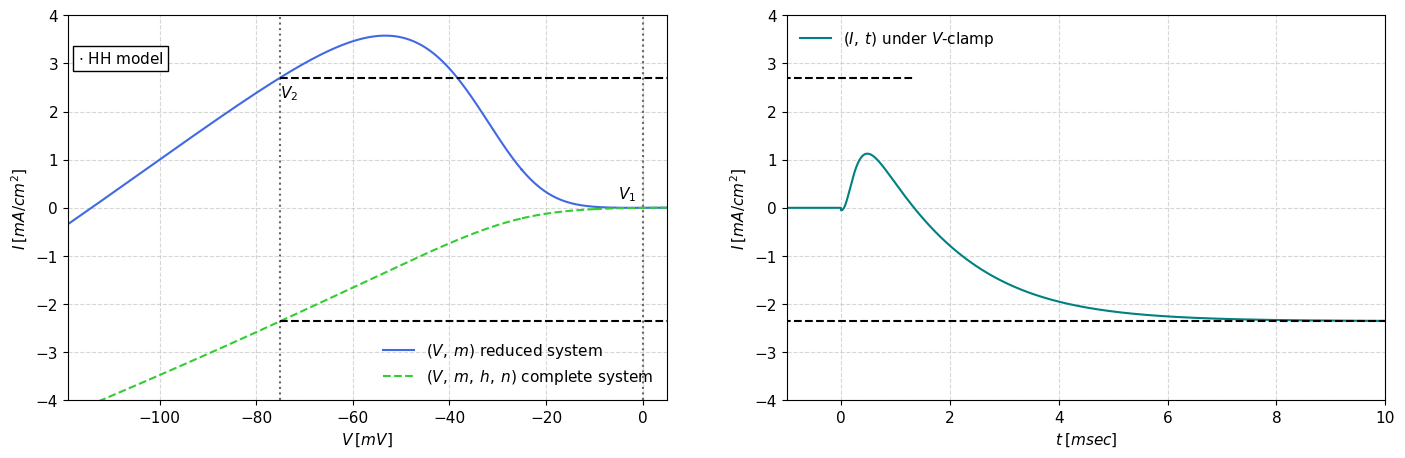

In [869]:
# V-clamp
V_1, V_2 = 0., -75.

fig, ax = plt.subplots(1, 2, figsize=(17, 5))
ax[0].plot(V_all, I_reduced/1000, color='royalblue', ls='-', label=r'$(V,\:m)$ reduced system')
ax[0].plot(V_all, I_complete/1000, color='limegreen', ls='--', label=r'$(V,\:m,\:h,\:n)$ complete system')
ax[0].vlines(V_1, -4, 4, color='dimgray', ls=':')
ax[0].vlines(V_2, -4, 4, color='dimgray', ls=':')
ax[0].text(V_1-5, 0.2, r'$V_1$', rotation=0)
ax[0].text(V_2, 2.3, r'$V_2$', rotation=0)
ax[0].text(-117, 3, r'$\cdot$ HH model', fontsize=11, 
           bbox=dict(facecolor='white', edgecolor='black', boxstyle='square'))

ax[0].hlines(I_reduced[V_all==V_2]/1000, V_2, 5, color='k', ls='--')
ax[0].hlines(I_complete[V_all==V_2]/1000, V_2, 5, color='k', ls='--')

ax[0].set_xlim(-119, 5)
ax[0].set_ylim(-4, 4)
ax[0].set_ylabel(r'$I\:[mA/cm^2]$')
ax[0].set_xlabel(r'$V\:[mV]$')
ax[0].grid(ls='--', alpha=0.5)
ax[0].legend(loc='lower right', frameon=False, ncol=1)

# V-clamp
m_0 = a_m(V_1)/(a_m(V_1)+b_m(V_1))
m_inf = a_m(V_2)/(a_m(V_2)+b_m(V_2))
tau_m = 1./(a_m(V_2)+b_m(V_2))
m_clamp = m_inf + (m_0-m_inf)*np.exp(-time_2/tau_m)

h_0 = a_h(V_1)/(a_h(V_1)+b_h(V_1))
h_inf = a_h(V_2)/(a_h(V_2)+b_h(V_2))
tau_h = 1./(a_h(V_2)+b_h(V_2))
h_clamp = h_inf + (h_0-h_inf)*np.exp(-time_2/tau_h)

n_0 = a_n(V_1)/(a_n(V_1)+b_n(V_1))
n_inf = a_n(V_2)/(a_n(V_2)+b_n(V_2))
tau_n = 1./(a_n(V_2)+b_n(V_2))
n_clamp = n_inf + (n_0-n_inf)*np.exp(-time_2/tau_n)

I_clamp = np.array([(lambda m, h, n, V_2, t: 120*(m**3)*h*(V_2+115) + 36*(n**4)*(V_2-12) + 0.3*(V_2+10.5989) if t>=0 else 0)(m_clamp[i], h_clamp[i], n_clamp[i], V_2, t) for i, t in enumerate(time_2)])

ax[1].plot(time_2, I_clamp/1000, ls='-', color='teal', label=r'$(I,\:t)$ under $V$-clamp')

ax[1].hlines(I_reduced[V_all==V_2]/1000, V_2, time_2[I_clamp>=0][-1], color='k', ls='--')
ax[1].hlines(I_complete[V_all==V_2]/1000, V_2, 10, color='k', ls='--')

ax[1].set_xlim(-1, 10)
ax[1].set_ylim(-4, 4)
ax[1].set_xlabel(r'$t\:[msec]$')
ax[1].set_ylabel(r'$I\:[mA/cm^2]$')
ax[1].grid(ls='--', alpha=0.5)
ax[1].legend(loc='upper left', frameon=False)

plt.savefig('img/HH_characteristics.png', transparent=True, dpi=500)
plt.show()

### Complete system comparison

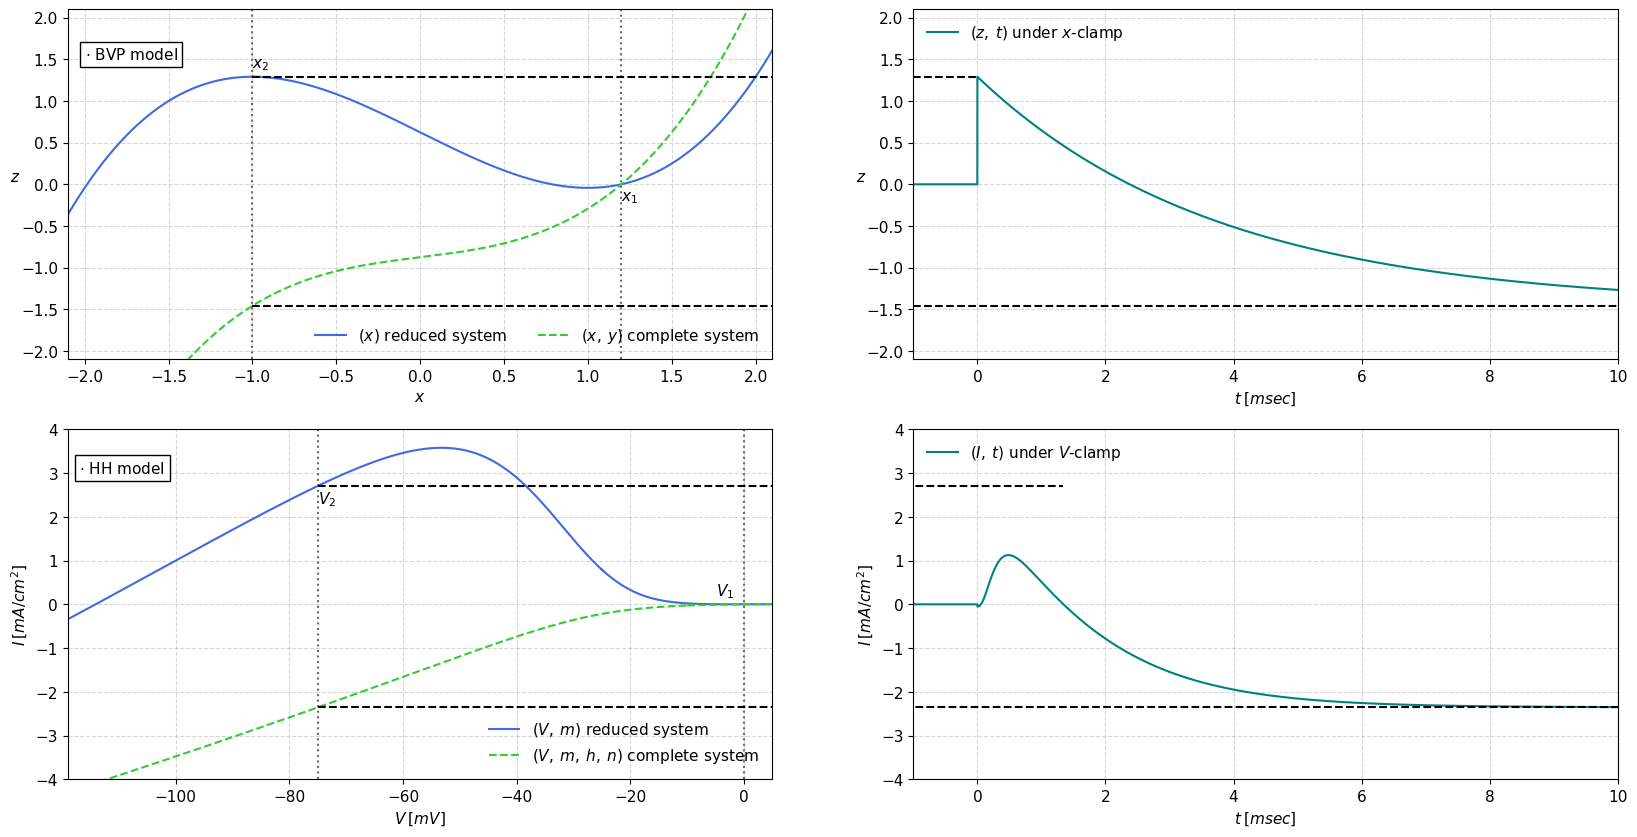

In [868]:
# x-clamp
x_1, x_2 = 1.2, -1.

fig, ax = plt.subplots(2, 2, figsize=(20, 10))
ax[0, 0].plot(x_char, z_x_char, color='royalblue', ls='-', label=r'$(x)$ reduced system')
ax[0, 0].plot(x_char, z_reduced_x_y, color='limegreen', ls='--', label=r'$(x,\:y)$ complete system')
ax[0, 0].vlines(x_1, -2.1, 2.1, color='dimgray', ls=':')
ax[0, 0].vlines(x_2, -2.1, 2.1, color='dimgray', ls=':')
ax[0, 0].text(x_1, -0.2, r'$x_1$', rotation=0)
ax[0, 0].text(x_2, 1.4, r'$x_2$', rotation=0)
ax[0, 0].text(-2, 1.5, r'$\cdot$ BVP model', fontsize=11, 
              bbox=dict(facecolor='white', edgecolor='black', boxstyle='square'))

ax[0, 0].hlines(-P_point[1] - x_2 + (x_2**3)/3., x_2, 2.1, color='k', ls='--')
ax[0, 0].hlines((x_2-a)/b - x_2 + (x_2**3)/3., x_2, 2.1, color='k', ls='--')

ax[0, 0].set_xlim(-2.1, 2.1)
ax[0, 0].set_ylim(-2.1, 2.1)
ax[0, 0].set_ylabel(r'$z$', rotation=0)
ax[0, 0].set_xlabel(r'$x$')
ax[0, 0].grid(ls='--', alpha=0.5)
ax[0, 0].legend(loc='lower right', frameon=False, ncol=2)

time_2 = np.arange(-1, 10+dt, dt)
y_clamp = [(lambda a, b, c, x_2, t: (a-x_2)/b *(1.-np.exp(-b*t/c)) + P_point[1]*np.exp(-b*t/c) if t >=0 else P_point[1])(a, b, c, x_2, t) for t in time_2]
z_clamp = [(lambda y, x_2, t: -x_2 + (x_2**3)/3. - y if t>=0 else 0)(y_clamp[i], x_2, t) for i, t in enumerate(time_2)]
ax[0, 1].plot(time_2, z_clamp, ls='-', color='teal', label=r'$(z,\:t)$ under $x$-clamp')

ax[0, 1].hlines(-P_point[1] - x_2 + (x_2**3)/3., x_2, 0, color='k', ls='--')
ax[0, 1].hlines((x_2-a)/b - x_2 + (x_2**3)/3., x_2, 10, color='k', ls='--')

ax[0, 1].set_xlim(-1, 10)
ax[0, 1].set_ylim(-2.1, 2.1)
ax[0, 1].set_xlabel(r'$t\:[msec]$')
ax[0, 1].set_ylabel(r'$z$', rotation=0)
ax[0, 1].grid(ls='--', alpha=0.5)
ax[0, 1].legend(loc='upper left', frameon=False)


# V-clamp
V_1, V_2 = 0., -75.

ax[1, 0].plot(V_all, I_reduced/1000, color='royalblue', ls='-', label=r'$(V,\:m)$ reduced system')
ax[1, 0].plot(V_all, I_complete/1000, color='limegreen', ls='--', label=r'$(V,\:m,\:h,\:n)$ complete system')
ax[1, 0].vlines(V_1, -4, 4, color='dimgray', ls=':')
ax[1, 0].vlines(V_2, -4, 4, color='dimgray', ls=':')
ax[1, 0].text(V_1-5, 0.2, r'$V_1$', rotation=0)
ax[1, 0].text(V_2, 2.3, r'$V_2$', rotation=0)
ax[1, 0].text(-117, 3, r'$\cdot$ HH model', fontsize=11, 
              bbox=dict(facecolor='white', edgecolor='black', boxstyle='square'))

ax[1, 0].hlines(I_reduced[V_all==V_2]/1000, V_2, 5, color='k', ls='--')
ax[1, 0].hlines(I_complete[V_all==V_2]/1000, V_2, 5, color='k', ls='--')

ax[1, 0].set_xlim(-119, 5)
ax[1, 0].set_ylim(-4, 4)
ax[1, 0].set_ylabel(r'$I\:[mA/cm^2]$')
ax[1, 0].set_xlabel(r'$V\:[mV]$')
ax[1, 0].grid(ls='--', alpha=0.5)
ax[1, 0].legend(loc='lower right', frameon=False, ncol=1)

# V-clamp
ax[1, 1].plot(time_2, I_clamp/1000, ls='-', color='teal', label=r'$(I,\:t)$ under $V$-clamp')

ax[1, 1].hlines(I_reduced[V_all==V_2]/1000, V_2, time_2[I_clamp>=0][-1], color='k', ls='--')
ax[1, 1].hlines(I_complete[V_all==V_2]/1000, V_2, 10, color='k', ls='--')

ax[1, 1].set_xlim(-1, 10)
ax[1, 1].set_ylim(-4, 4)
ax[1, 1].set_xlabel(r'$t\:[msec]$')
ax[1, 1].set_ylabel(r'$I\:[mA/cm^2]$')
ax[1, 1].grid(ls='--', alpha=0.5)
ax[1, 1].legend(loc='upper left', frameon=False)

plt.savefig('img/BVP_HH_charac_comparison.png', transparent=True, dpi=500)
plt.show()

### Gillespie simulation of the associated Master Equation

In [173]:
# Gillespie
omega = 10**3
data = np.loadtxt('BVP_res.txt')
x_Gill = data[:, 0]/omega - 2.
y_Gill = data[:, 1]/omega - 2.

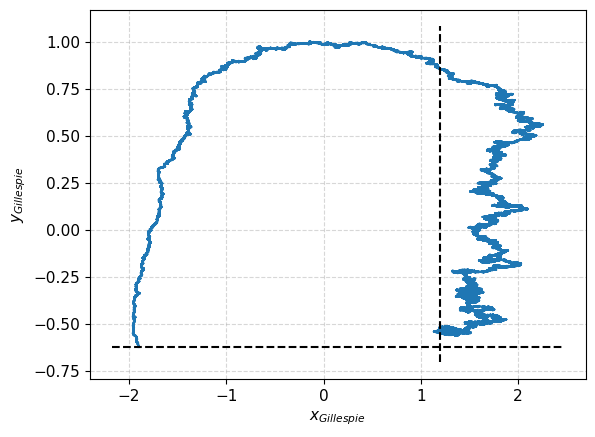

In [1005]:
plt.plot(x_Gill, y_Gill)
plt.vlines(P_point[0], *plt.ylim(), color='k', ls='--')
plt.hlines(P_point[1], *plt.xlim(), color='k', ls='--')
plt.xlabel(r'$x_{Gillespie}$')
plt.ylabel(r'$y_{Gillespie}$')
plt.grid(ls='--', alpha=0.5)
plt.show()

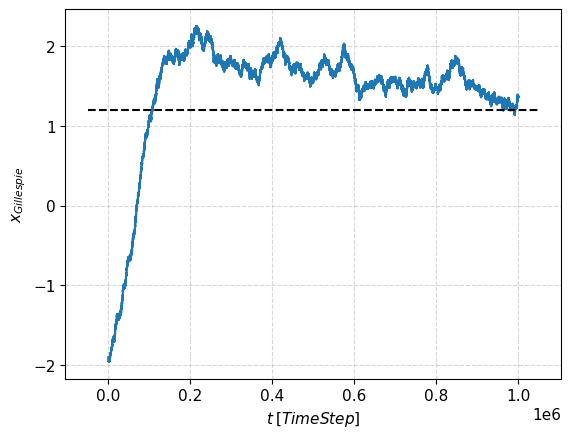

In [1006]:
plt.plot(x_Gill)
plt.hlines(P_point[0], *plt.xlim(), color='k', ls='--')
plt.ylabel(r'$x_{Gillespie}$')
plt.xlabel(r'$t\:[TimeStep]$')
plt.grid(ls='--', alpha=0.5)
plt.show()

In [1007]:
class prova:
    def __init__(self, a, b, c, z, omega):
        self.a = a
        self.b = b
        self.c = c
        self.z = z
        self.omega = omega

    def __call__(self, t, u):
        x, y = u[0], u[1]
        dx = self.c*self.omega*(y/self.omega + x/self.omega - 4 - ((x/self.omega-2)**3)/3. + self.z)
        dy = -self.omega*(x/self.omega - 2 - self.a + self.b * (y/self.omega-2))/self.c
        return dx, dy

In [1008]:
a, b, c, z = [0.7, 0.8, 3, 0]
prova_x_space = 0
prova_y_space = 1800

# y0 = (lambda x0, dot_x0, c: dot_x0/c + (x0**3)/3. - x0)(x0, dot_x0, c)
prova_simulation = prova(a=a, b=b, c=c, z=z, omega=omega)
evolution = RungeKutta4(prova_simulation)

prova_x_sim, prova_y_sim = [], []

evolution.set_initial_condition([prova_x_space, prova_y_space])
prova_x, prova_y = [], []
for t_span in [(0, 100)]:
    t, u = evolution.solve(t_span=t_span, N=10000)
    prova_x.extend(u[:, 0])
    prova_y.extend(u[:, 1])
prova_x, prova_y = np.array(prova_x), np.array(prova_y)

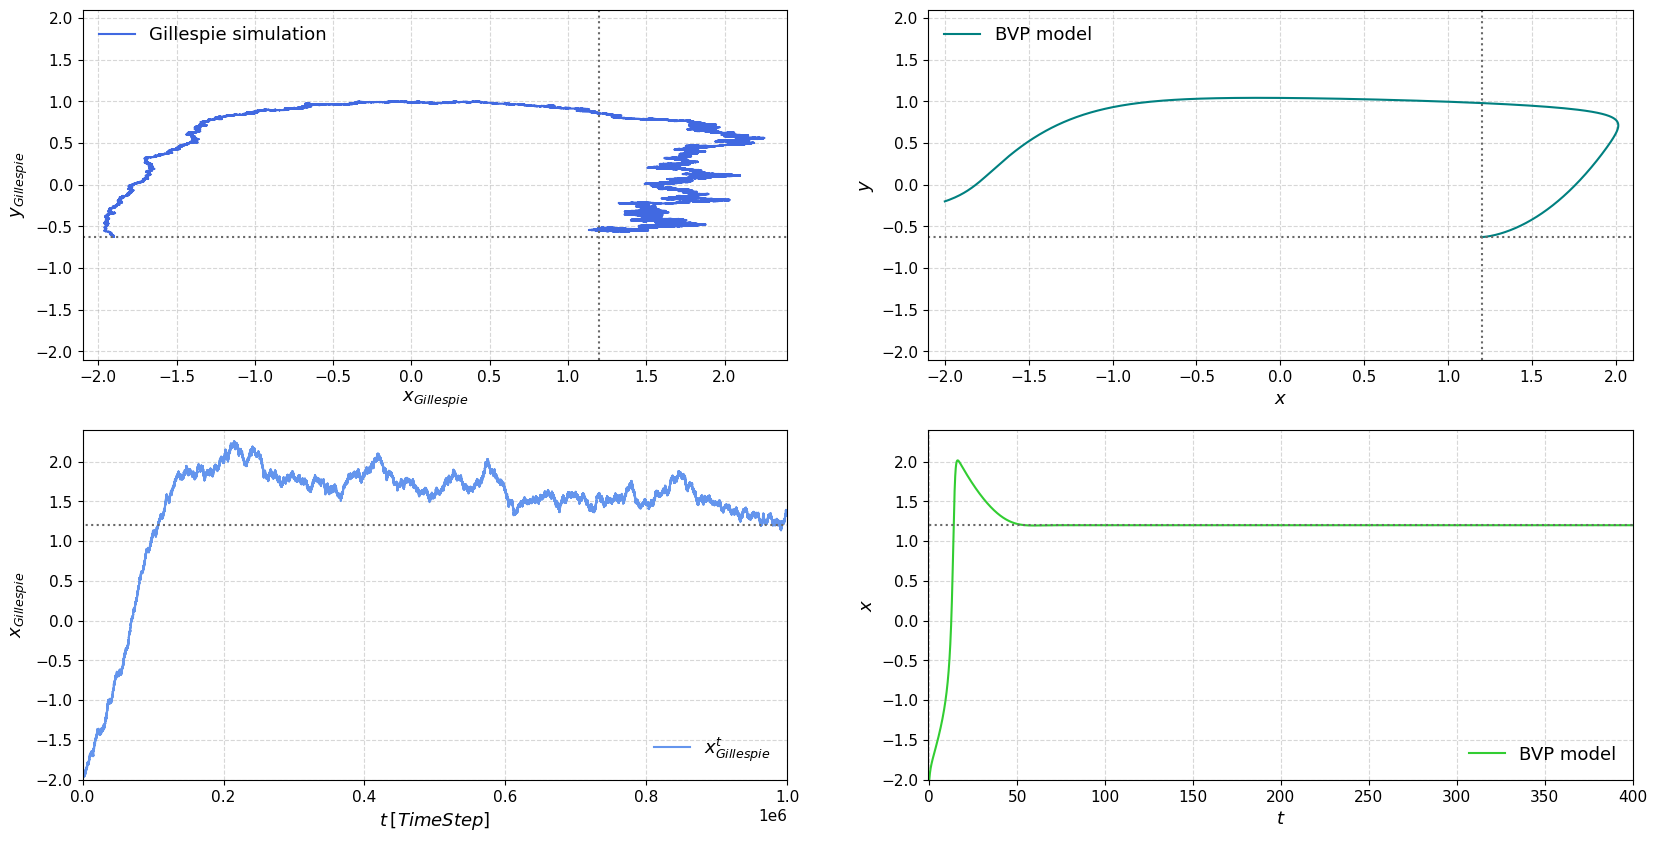

In [1013]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
ax[0, 0].plot(x_Gill, y_Gill, color='royalblue', ls='-', label=f'Gillespie simulation')
ax[0, 0].vlines(P_point[0], -2.1, 2.1, color='dimgray', ls=':')
ax[0, 0].hlines(P_point[1], -2.1, 2.4, color='dimgray', ls=':')
ax[0, 0].set_xlim(-2.1, 2.4)
ax[0, 0].set_ylim(-2.1, 2.1)
ax[0, 0].set_xlabel(r'$x_{Gillespie}$', fontsize=13)
ax[0, 0].set_ylabel(r'$y_{Gillespie}$', fontsize=13)
ax[0, 0].grid(ls='--', alpha=0.5)
ax[0, 0].legend(loc='upper left', frameon=False, fontsize=13)
ax[0, 0].set_aspect('auto')

time_2 = np.arange(-1, 10+dt, dt)
ax[0, 1].plot(prova_x/omega-2, prova_y/omega-2, ls='-', color='teal', label=f'BVP model')

ax[0, 1].vlines(P_point[0], -2.1, 2.1, color='dimgray', ls=':')
ax[0, 1].hlines(P_point[1], -2.1, 2.1, color='dimgray', ls=':')
ax[0, 1].set_xlim(-2.1, 2.1)
ax[0, 1].set_ylim(-2.1, 2.1)
ax[0, 1].set_xlabel(r'$x$', fontsize=13)
ax[0, 1].set_ylabel(r'$y$', fontsize=13)
ax[0, 1].grid(ls='--', alpha=0.5)
ax[0, 1].legend(loc='upper left', frameon=False, fontsize=13)
ax[0, 1].set_aspect('auto')


ax[1, 0].plot(x_Gill, color='cornflowerblue', ls='-', label=r'$x_{Gillespie}^t$')
ax[1, 0].hlines(P_point[0], *ax[1, 0].get_xlim(), color='dimgray', ls=':')
ax[1, 0].set_ylim(-2., 2.4)
ax[1, 0].set_xlim(-100, len(x_Gill)+100)
ax[1, 0].set_ylabel(r'$x_{Gillespie}$', fontsize=13)
ax[1, 0].set_xlabel(r'$t\:[TimeStep]$', fontsize=13)
ax[1, 0].grid(ls='--', alpha=0.5)
ax[1, 0].legend(loc='lower right', frameon=False, fontsize=13)
ax[1, 0].set_aspect('auto')

ax[1, 1].plot(np.arange(0, 500+0.01, 0.05), prova_x/omega-2, ls='-', 
              color='limegreen', label=f'BVP model')
ax[1, 1].hlines(P_point[0], *ax[1, 1].get_xlim(), color='dimgray', ls=':')
ax[1, 1].set_ylim(-2., 2.4)
ax[1, 1].set_xlim((-0.7, 400))
ax[1, 1].set_xlabel(r'$t$', fontsize=13)
ax[1, 1].set_ylabel(r'$x$', fontsize=13)
ax[1, 1].grid(ls='--', alpha=0.5)
ax[1, 1].legend(loc='lower right', frameon=False, fontsize=13)
ax[1, 1].set_aspect('auto')

plt.savefig('img/Gillespie.png', transparent=True, dpi=500)
plt.show()

### Gillespie: Limiting cycle simulation

In [1014]:
a, b, c, z = [0.7, 0.8, 3, -0.4]
prova_x_space = 3200
prova_y_space = 1375

# y0 = (lambda x0, dot_x0, c: dot_x0/c + (x0**3)/3. - x0)(x0, dot_x0, c)
prova_simulation = prova(a=a, b=b, c=c, z=z, omega=omega)
evolution = RungeKutta4(prova_simulation)

prova_x_sim, prova_y_sim = [], []

evolution.set_initial_condition([prova_x_space, prova_y_space])
prova_x, prova_y = [], []
for t_span in [(0, 100)]:
    t, u = evolution.solve(t_span=t_span, N=10000)
    prova_x.extend(u[:, 0])
    prova_y.extend(u[:, 1])
prova_x, prova_y = np.array(prova_x), np.array(prova_y)

In [170]:
# Gillespie: z = -0.4
omega = 10**3
data = np.loadtxt('BVP_res_limit_cycle.txt')
x_Gill = data[:, 0]/omega - 2.
y_Gill = data[:, 1]/omega - 2.

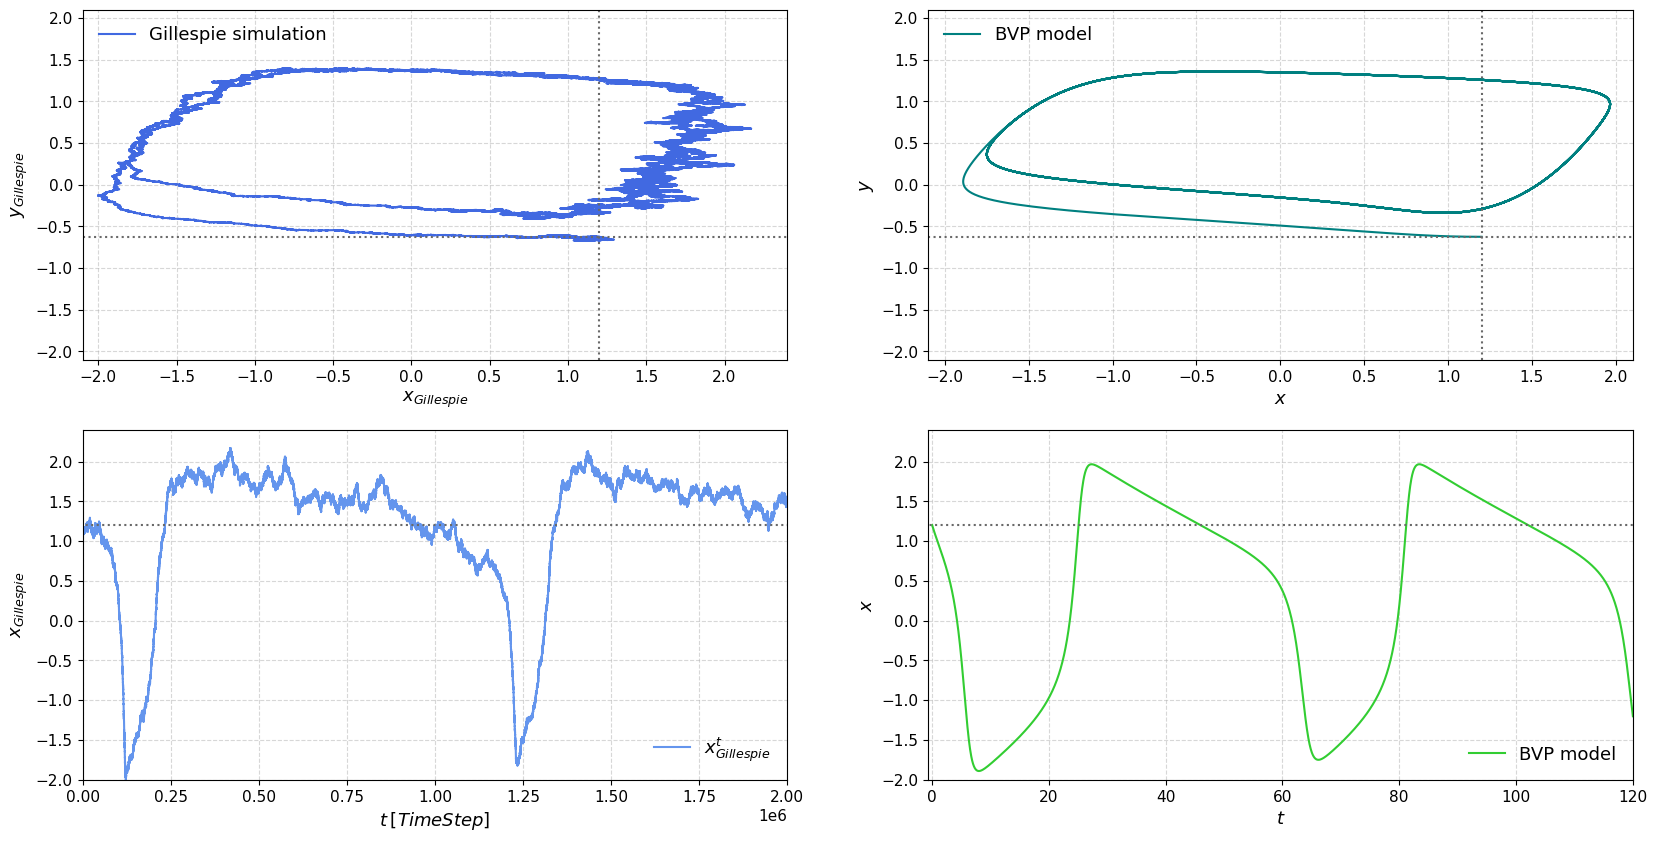

In [1022]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
ax[0, 0].plot(x_Gill, y_Gill, color='royalblue', ls='-', label=f'Gillespie simulation')
ax[0, 0].vlines(P_point[0], -2.1, 2.1, color='dimgray', ls=':')
ax[0, 0].hlines(P_point[1], -2.1, 2.4, color='dimgray', ls=':')
ax[0, 0].set_xlim(-2.1, 2.4)
ax[0, 0].set_ylim(-2.1, 2.1)
ax[0, 0].set_xlabel(r'$x_{Gillespie}$', fontsize=13)
ax[0, 0].set_ylabel(r'$y_{Gillespie}$', fontsize=13)
ax[0, 0].grid(ls='--', alpha=0.5)
ax[0, 0].legend(loc='upper left', frameon=False, fontsize=13)
ax[0, 0].set_aspect('auto')

time_2 = np.arange(-1, 10+dt, dt)
ax[0, 1].plot(prova_x/omega-2, prova_y/omega-2, ls='-', color='teal', label=f'BVP model')

ax[0, 1].vlines(P_point[0], -2.1, 2.1, color='dimgray', ls=':')
ax[0, 1].hlines(P_point[1], -2.1, 2.1, color='dimgray', ls=':')
ax[0, 1].set_xlim(-2.1, 2.1)
ax[0, 1].set_ylim(-2.1, 2.1)
ax[0, 1].set_xlabel(r'$x$', fontsize=13)
ax[0, 1].set_ylabel(r'$y$', fontsize=13)
ax[0, 1].grid(ls='--', alpha=0.5)
ax[0, 1].legend(loc='upper left', frameon=False, fontsize=13)
ax[0, 1].set_aspect('auto')


ax[1, 0].plot(x_Gill, color='cornflowerblue', ls='-', label=r'$x_{Gillespie}^t$')
ax[1, 0].hlines(P_point[0], *ax[1, 0].get_xlim(), color='dimgray', ls=':')
ax[1, 0].set_ylim(-2., 2.4)
ax[1, 0].set_xlim(-100, len(x_Gill)+100)
ax[1, 0].set_ylabel(r'$x_{Gillespie}$', fontsize=13)
ax[1, 0].set_xlabel(r'$t\:[TimeStep]$', fontsize=13)
ax[1, 0].grid(ls='--', alpha=0.5)
ax[1, 0].legend(loc='lower right', frameon=False, fontsize=13)
ax[1, 0].set_aspect('auto')

ax[1, 1].plot(np.arange(0, 500+0.01, 0.05), prova_x/omega-2, ls='-', 
              color='limegreen', label=f'BVP model')
ax[1, 1].hlines(P_point[0], *ax[1, 1].get_xlim(), color='dimgray', ls=':')
ax[1, 1].set_ylim(-2., 2.4)
ax[1, 1].set_xlim((-0.7, 120)) # 400
ax[1, 1].set_xlabel(r'$t$', fontsize=13)
ax[1, 1].set_ylabel(r'$x$', fontsize=13)
ax[1, 1].grid(ls='--', alpha=0.5)
ax[1, 1].legend(loc='lower right', frameon=False, fontsize=13)
ax[1, 1].set_aspect('auto')

plt.savefig('img/Gillespie_limit_cycle.png', transparent=True, dpi=500)
plt.show()

### Linear Noise Approximation: Van-Kampen expansion

In [866]:
# x_sim, y_sim
# r = 2.
# Jacobian = np.array([[-1, -r/4], [r/4, -1]])
Jacobian = np.array([[(1-P_point[0]**2)*c, c], [-1./c, -b/c]])
omega_var = np.arange(0, 10**3, 0.01)
phi_matrix = np.array([Jacobian + 1.j*omega_var[i]*np.identity(n=2) for i in range(len(omega_var))])
delta_Kronecker = lambda l, m: 1 if l == m else 0 
adjoint_operation = lambda matrix: np.transpose(np.conjugate(matrix))
power_spectrum_0 = []
power_spectrum_1 = []
for index_omega, o in enumerate(omega_var):
    # res0, res1 = 0, 0
    res1 = np.linalg.inv(phi_matrix[index_omega])*np.identity(n=2)*np.linalg.inv(adjoint_operation(phi_matrix[index_omega]))
    # for l in range(2):
    #     for m in range(2):
    #         res0 += np.linalg.inv(phi_matrix[index_omega])[0][l] * delta_Kronecker(l, m) * np.linalg.inv((adjoint_operation(phi_matrix[index_omega])))[m][0] 
    #         res1 += np.linalg.inv(phi_matrix[index_omega])[1][l] * delta_Kronecker(l, m) * np.linalg.inv((adjoint_operation(phi_matrix[index_omega])))[m][1] 
    # power_spectrum_0.append(res0)
    power_spectrum_1.append(res1)
# power_spectrum_0, power_spectrum_1 = np.array(power_spectrum_0), np.array(power_spectrum_1)
power_spectrum_1 = np.array(power_spectrum_1)

In [848]:
val, vec = np.linalg.eig(Jacobian)
val[0].imag, val

(0.8513884036557519, array([-0.79120245+0.8513884j, -0.79120245-0.8513884j]))

In [885]:
power_spec = [np.trace(matr) for matr in power_spectrum_1]

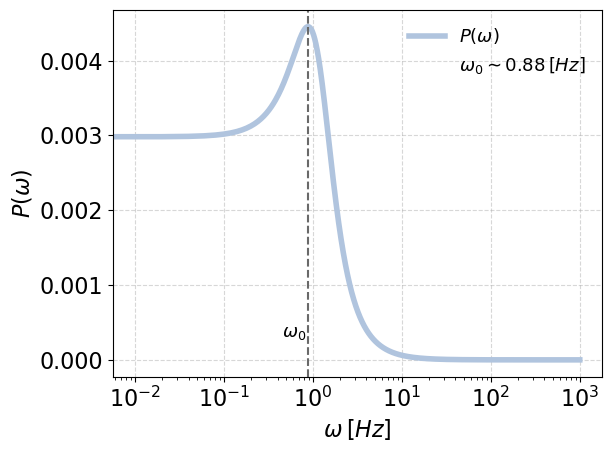

In [893]:
# plt.plot(omega_var, power_spectrum_0, label=r'$\xi$')
plt.plot(omega_var, np.abs(power_spec)/sum(np.abs(power_spec)), color='lightsteelblue', lw=4, label=r'$P(\omega)$')
omega_peak = omega_var[np.argmax(power_spec)]
# omega_peak_2 = omega_var[np.argmax(power_spectrum_1)]
lim = plt.ylim()
plt.vlines(omega_peak, *lim, ls='--', color='dimgray')
# plt.vlines(omega_peak_2, *lim, ls='--', color='dimgray')
plt.ylim(lim)
plt.text(0.45, 3e-4, r'$\omega_0$', fontsize=13)
plt.xlabel(r'$\omega\:[Hz]$')
plt.ylabel(r'$P(\omega)$')
plt.xscale('log')
# plt.xlim(0, 6)
plt.plot([], [], ls='', color='w', label=r'$\omega_0\sim$'+f'{round(omega_peak, 2)}'+r'$\:[Hz]$')
# plt.plot([], [], ls='', color='w', label=r'$\omega_0\sim$'+f'{round(omega_peak_2, 2)}')
plt.legend(fontsize=13, frameon=False)
plt.grid(ls='--', alpha=0.5)
plt.tight_layout()
plt.savefig('img/power_spectrum.png', dpi=500, transparent=True)
plt.show()

### Hopf bifurcation

In [891]:
def compute_eigs(matrix):
    val, _ = np.linalg.eig(matrix)
    return val
    
def Jacobian_form(P, b, c):
    J = np.array([[(1-P[0]**2)*c, c], [-1./c, -b/c]])
    return J

iter_zip = zip(np.linspace(-2.1, 2.1, 100), np.linspace(0.2, 4.5, 100), np.linspace(0.2, 5, 100), np.linspace(2, 10, 100), np.linspace(-2, 2, 100))
x0 = 1.20
points = []
for z_var in np.arange(-0.4, 0.5, 0.01):
    try:
        point = find_P(x0, a, b, z_var)
        points.append(point)
    except:
        print(f'Unable to find eq. point for z = {z_var}')
# c_var = np.linspace(2, 10, 100)
point = find_P(x0, a, b, -0.4)
real1, real2, imag1, imag2 = [], [], [], []
for c_var in np.linspace(0.5, 10, 100):
    J = Jacobian_form(point, b, c_var)
    eig = compute_eigs(J)
    real1.append(eig[0].real)
    real2.append(eig[1].real)
    imag1.append(eig[0].imag)
    imag2.append(eig[1].imag)

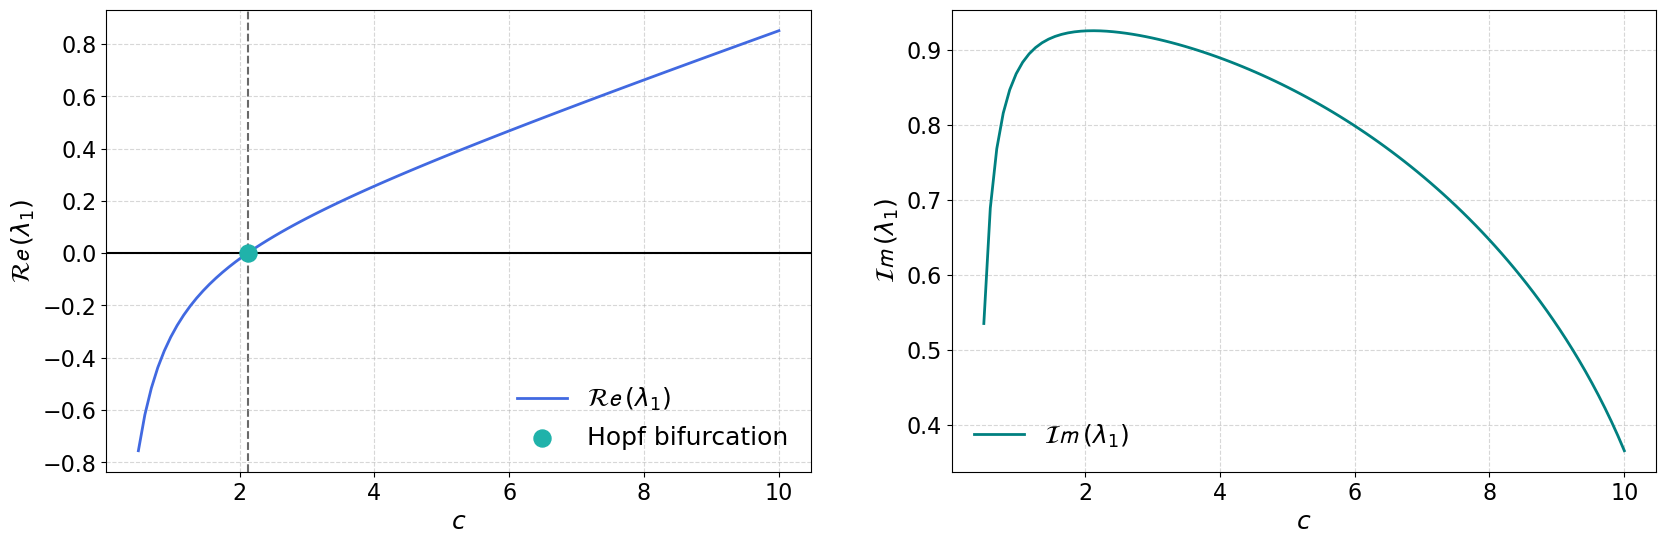

In [894]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
c_var = np.linspace(0.5, 10, 100)
ax[0].plot(c_var, real1, label=r'$\mathcal{Re}\:(\lambda_1)$', lw=2, color='royalblue')
lims = ax[0].get_xlim()
ax[0].hlines(0, *lims, color='k')
ax[0].set_xlim(lims)
Hopf_point = c_var[(np.array(real1) >= 0)][0]
ax[0].scatter(Hopf_point, np.array(real1)[(np.array(real1) >= 0)][0], 
              s=150, color='lightseagreen', zorder=2, 
              label='Hopf bifurcation')
lims = ax[0].get_ylim() 
ax[0].vlines(Hopf_point, *lims, color='dimgray', ls='--', zorder=1)
ax[0].set_ylim(lims)
ax[0].set_xlabel(r'$c$', fontsize=18)
ax[0].set_ylabel(r'$\mathcal{Re}\:(\lambda_1)$', fontsize=18)
ax[0].legend(loc='lower right', frameon=False, fontsize=18)
ax[0].grid(ls='--', alpha=0.5)

ax[1].plot(c_var, imag1, lw=2, label=r'$\mathcal{Im}\:(\lambda_1)$', color='teal')
ax[1].set_xlabel(r'$c$', fontsize=18)
ax[1].set_ylabel(r'$\mathcal{Im}\:(\lambda_1)$', fontsize=18)
ax[1].legend(loc='lower left', frameon=False, fontsize=18)
ax[1].grid(ls='--', alpha=0.5)

plt.savefig('img/Hopf_bifurcation.png', dpi=500, transparent=True)
plt.show()

In [450]:
Hopf_point

2.1313131313131315

### Finite train of impulses: 

\begin{equation*}
    z(t) = 
    \begin{cases}
        -0.5 + \frac{4}{3T} t, \quad t \in [0, 3T/4] \\ 
        0, \quad \text{otherwise}
    \end{cases}
\end{equation*}

In [827]:
class z_func:
    def __init__(self, a, b, c, z, omega):
        self.a = a
        self.b = b
        self.c = c
        self.z = z
        self.omega = omega
        self.index = 0 

    def __call__(self, t, u):
        x, y = u[0], u[1]
        dx = self.c*self.omega*(y/self.omega + x/self.omega - 4 - ((x/self.omega-2)**3)/3. + self.z[self.index]) 
        dy = -self.omega*(x/self.omega - 2 - self.a + self.b * (y/self.omega-2))/self.c
        self.index += 1
        return dx, dy

In [830]:
dt = 100/10000
time = np.arange(0, 1000+dt, dt)
input_signal = np.array(np.linspace(-0.5, 0.5, int(3*len(time)/4)).tolist() + [0]*int(len(time)/4))
a, b, c, z = [0.7, 0.8, 3, input_signal]
z_func_x_space = 0
z_func_y_space = 1800

z_func_simulation = z_func(a=a, b=b, c=c, z=z, omega=omega)
evolution = RungeKutta4(z_func_simulation)

# LNA_x_sim, LNA_y_sim = [], []

evolution.set_initial_condition([z_func_x_space, z_func_y_space])
t, u = evolution.solve(t_span=(0, 100), N=10000)
z_func_x_sim, z_func_y_sim = u[:, 0], u[:, 1]

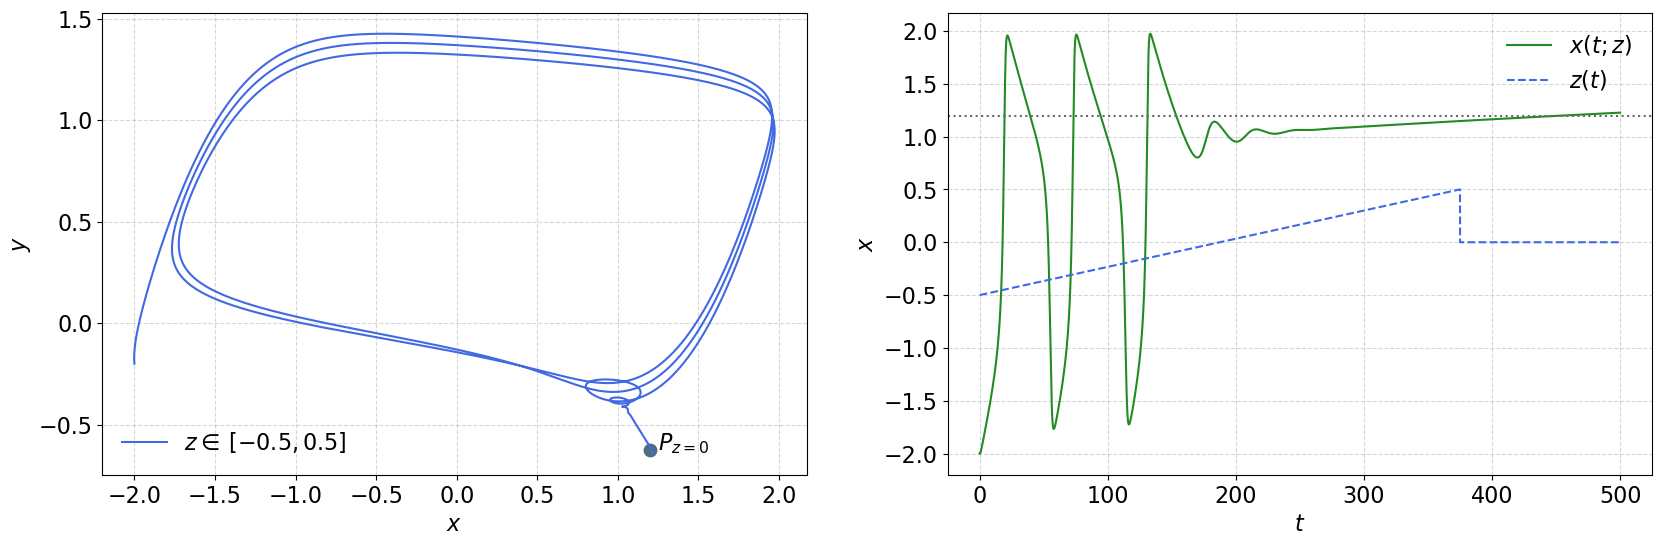

In [846]:
plt.rcParams.update({'font.size': 16})  

fig, ax = plt.subplots(1, 2, figsize=(20, 6))
ax[0].plot(z_func_x_sim/omega-2, z_func_y_sim/omega-2, 
           color='royalblue', label=r'$z \in \:[-0.5, 0.5]$')
ax[0].text(P_point[0]+0.05, P_point[1], r'$P_{z=0}$')
ax[0].scatter(*P_point, s=80, color='#4f6d7a')
ax[0].grid(ls='--', alpha=0.5)
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$y$')
ax[0].legend(frameon=False)

ax[1].plot(np.arange(0, 500+0.01, 0.05), z_func_x_sim/omega-2, 
           color='forestgreen', label=r'$x(t; z)$')
ax[1].plot(time[:-1]/2, input_signal, label=r'$z(t)$',  
           color='royalblue', ls='--')
lims = ax[1].get_xlim()
ax[1].hlines(P_point[0], *lims, ls=':', color='dimgray')
ax[1].set_xlim(*lims)
ax[1].grid(ls='--', alpha=0.5)
ax[1].set_xlabel(r'$t$')
ax[1].set_ylabel(r'$x$')
ax[1].legend(frameon=False)

plt.savefig('img/BVP_z_change_in_time.png', dpi=500, transparent=True)
plt.show()